In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
import warnings
import random
warnings.filterwarnings('ignore')

In [262]:
pip install faker

# Creating Synthetic Dataset Generation using Faker

In [263]:
from faker import Faker
np.random.seed(32)
fake = Faker()
Faker.seed(32)

# Number of rows in the dataset
start_index = 1
num_rows = 1500
# Generate synthetic data
battery_values = [3000, 3500, 4000, 4500, 5000, 5500, 6000]

data = {
    'Unnamed: 0': list(range(start_index, start_index + num_rows)),
    'Company': [fake.random_element(['Apple', 'Samsung', 'Google', 'Huawei', 'OnePlus', 'Sony', 'LG', 'Motorola', 'Xiaomi', 'Nokia', 'Oppo', 'Vivo', 'Realme']) for _ in range(num_rows)],
    'Weight(gm)': [fake.pyfloat(right_digits=2, positive=True, min_value=100, max_value=250) for _ in range(num_rows)],
    'PPI': [fake.random_int(min=100, max=800) for _ in range(num_rows)],
    'CPU_core': [fake.random_int(min=1, max=8) for _ in range(num_rows)],
    'CPU_freq': [fake.pyfloat(left_digits=1, right_digits=1, positive=True, min_value=1, max_value=2.7) for _ in range(num_rows)],
    'Dual_sim' :[fake.random_element(['Yes','No']) for _ in range(num_rows)],
    'Internal_mem(GB)': [fake.random_element(['16GB', '32GB', '64GB','128GB','256GB']) for _ in range(num_rows)],
    'RAM': [fake.random_int(min=4, max=16) for _ in range(num_rows)],
    'RearCam': [fake.random_int(min=20, max=108) for _ in range(num_rows)],
    'Front_Cam': [fake.random_int(min=10, max=32) for _ in range(num_rows)],
    'Gen_5G' :[fake.random_element(['Yes','No']) for _ in range(num_rows)],
    'Battery': [fake.random_element(battery_values) for _ in range(num_rows)],
    'Thickness': [fake.random_int(min=5, max=18) for _ in range(num_rows)],
    # 'Price': [fake.random_int(min=5000, max=100000) for _ in range(num_rows)]
}

df = pd.DataFrame(data)
df.head()

Unnamed: 0  Company  Weight(gm)  PPI  CPU_core  CPU_freq Dual_sim  \
0           1  Samsung      180.32  312         1       1.5       No   
1           2   Huawei      159.12  362         1       1.6       No   
2           3   Google      159.29  241         1       1.0       No   
3           4  OnePlus      214.38  555         4       1.2      Yes   
4           5     Vivo      102.43  607         8       1.8      Yes   

  Internal_mem(GB)  RAM  RearCam  Front_Cam Gen_5G  Battery  Thickness  
0             16GB    8       77         31    Yes     5000         17  
1             64GB    8       51         13     No     3000         12  
2             16GB   11       84         23     No     5000         11  
3             32GB    7       91         10     No     6000          8  
4            128GB   12       71         27     No     4500         11

# Removing unwanted rows and unwanted data

In [264]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df["Internal_mem(GB)"] = df["Internal_mem(GB)"].str.replace('GB', '').astype(int)

In [265]:
df_copy = df.copy()
df_copy.head()

Company  Weight(gm)  PPI  CPU_core  CPU_freq Dual_sim  Internal_mem(GB)  \
0  Samsung      180.32  312         1       1.5       No                16   
1   Huawei      159.12  362         1       1.6       No                64   
2   Google      159.29  241         1       1.0       No                16   
3  OnePlus      214.38  555         4       1.2      Yes                32   
4     Vivo      102.43  607         8       1.8      Yes               128   

   RAM  RearCam  Front_Cam Gen_5G  Battery  Thickness  
0    8       77         31    Yes     5000         17  
1    8       51         13     No     3000         12  
2   11       84         23     No     5000         11  
3    7       91         10     No     6000          8  
4   12       71         27     No     4500         11

# Performing label encoding (converting catogirical data to numerical data)

In [266]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_copy['Gen_5G'] = label_encoder.fit_transform(df_copy['Gen_5G']).astype(int)
df_copy['Dual_sim'] = label_encoder.fit_transform(df_copy['Dual_sim']).astype(int)

In [267]:
df_copy.describe()

Weight(gm)          PPI     CPU_core     CPU_freq     Dual_sim  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean    176.520353   449.583333     4.427333     1.451667     0.518667   
std      43.239296   200.174228     2.345006     0.287249     0.499818   
min     100.120000   100.000000     1.000000     1.000000     0.000000   
25%     139.862500   272.750000     2.000000     1.200000     0.000000   
50%     175.975000   451.000000     4.000000     1.500000     1.000000   
75%     214.347500   624.000000     6.000000     1.700000     1.000000   
max     249.940000   799.000000     8.000000     1.900000     1.000000   

       Internal_mem(GB)          RAM      RearCam    Front_Cam       Gen_5G  \
count       1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean          98.570667    10.054667    63.491333    21.166667     0.491333   
std           86.612660     3.786983    25.918573     6.680767     0.500092   
min           16.000000     4.000000    20.000000    10.000000     0.000000   
25%           32.000000     7.000000    41.000000    15.000000     0.000000   
50%           64.000000    10.000000    63.000000    21.000000     0.000000   
75%          128.000000    14.000000    86.000000    27.000000     1.000000   
max          256.000000    16.000000   108.000000    32.000000     1.000000   

           Battery    Thickness  
count  1500.000000  1500.000000  
mean   4525.333333    11.478000  
std    1006.992674     4.028938  
min    3000.000000     5.000000  
25%    3500.000000     8.000000  
50%    4500.000000    11.000000  
75%    5500.000000    15.000000  
max    6000.000000    18.000000

# Generating Price based on the features weights(How much the feature contributes in price)

In [268]:
#comapany wegihts
user_defined_values = {'Apple': 250,'Samsung': 160,'Google': 85,'Huawei': 100,'OnePlus': 180,'Sony': 90,'LG': 70,
    'Motorola': 60,'Xiaomi': 45,'Nokia': 50,'Oppo': 20,'Vivo': 40,'Realme': 30,}
df_copy['Company'] = df_copy['Company'].map(user_defined_values)

# Maximum Absolute scaler

In [269]:
max_vals = np.max(np.abs(df_copy))
max_vals

Company              250.00
Weight(gm)           249.94
PPI                  799.00
CPU_core               8.00
CPU_freq               1.90
Dual_sim               1.00
Internal_mem(GB)     256.00
RAM                   16.00
RearCam              108.00
Front_Cam             32.00
Gen_5G                 1.00
Battery             6000.00
Thickness             18.00
dtype: float64

In [270]:
r=(df_copy) / max_vals
r.head()

Company  Weight(gm)       PPI  CPU_core  CPU_freq  Dual_sim  \
0     0.64    0.721453  0.390488     0.125  0.789474       0.0   
1     0.40    0.636633  0.453066     0.125  0.842105       0.0   
2     0.34    0.637313  0.301627     0.125  0.526316       0.0   
3     0.72    0.857726  0.694618     0.500  0.631579       1.0   
4     0.16    0.409818  0.759700     1.000  0.947368       1.0   

   Internal_mem(GB)     RAM   RearCam  Front_Cam  Gen_5G   Battery  Thickness  
0            0.0625  0.5000  0.712963    0.96875     1.0  0.833333   0.944444  
1            0.2500  0.5000  0.472222    0.40625     0.0  0.500000   0.666667  
2            0.0625  0.6875  0.777778    0.71875     0.0  0.833333   0.611111  
3            0.1250  0.4375  0.842593    0.31250     0.0  1.000000   0.444444  
4            0.5000  0.7500  0.657407    0.84375     0.0  0.750000   0.611111

In [271]:
def calculate_price(data):
  # weight_vector = [17,1,7,8,7,4,14,15,7,6,3,13,2]
  weight_vector = [0.15, 0.04, 0.05, 0.11, 0.08, 0.04, 0.14, 0.17, 0.06, 0.02, 0.04, 0.09, 0.01]
  x = pd.DataFrame(np.array(weight_vector * data))
  x = x*1000
  x.columns = df.columns
  return x
df_new = calculate_price(r)
df_new.head()

Company  Weight(gm)        PPI  CPU_core   CPU_freq  Dual_sim  \
0     96.0   28.858126  19.524406     13.75  63.157895       0.0   
1     60.0   25.465312  22.653317     13.75  67.368421       0.0   
2     51.0   25.492518  15.081352     13.75  42.105263       0.0   
3    108.0   34.309034  34.730914     55.00  50.526316      40.0   
4     24.0   16.392734  37.984981    110.00  75.789474      40.0   

   Internal_mem(GB)      RAM    RearCam  Front_Cam  Gen_5G  Battery  Thickness  
0              8.75   85.000  42.777778     19.375    40.0     75.0   9.444444  
1             35.00   85.000  28.333333      8.125     0.0     45.0   6.666667  
2              8.75  116.875  46.666667     14.375     0.0     75.0   6.111111  
3             17.50   74.375  50.555556      6.250     0.0     90.0   4.444444  
4             70.00  127.500  39.444444     16.875     0.0     67.5   6.111111

In [272]:
df_new['Price'] = df_new.sum(axis=1)
df_new['Price'] = df_new['Price'].round(-1)
df_new

Company  Weight(gm)        PPI  CPU_core   CPU_freq  Dual_sim  \
0        96.0   28.858126  19.524406     13.75  63.157895       0.0   
1        60.0   25.465312  22.653317     13.75  67.368421       0.0   
2        51.0   25.492518  15.081352     13.75  42.105263       0.0   
3       108.0   34.309034  34.730914     55.00  50.526316      40.0   
4        24.0   16.392734  37.984981    110.00  75.789474      40.0   
...       ...         ...        ...       ...        ...       ...   
1495     42.0   34.566696  39.236546     41.25  67.368421       0.0   
1496    150.0   24.767544  28.848561     27.50  54.736842      40.0   
1497     54.0   33.880131  29.161452     55.00  58.947368       0.0   
1498     42.0   16.115868  46.433041     27.50  71.578947      40.0   
1499     27.0   35.048412  42.365457     55.00  63.157895       0.0   

      Internal_mem(GB)      RAM    RearCam  Front_Cam  Gen_5G  Battery  \
0                 8.75   85.000  42.777778     19.375    40.0     75.0   
1                35.00   85.000  28.333333      8.125     0.0     45.0   
2                 8.75  116.875  46.666667     14.375     0.0     75.0   
3                17.50   74.375  50.555556      6.250     0.0     90.0   
4                70.00  127.500  39.444444     16.875     0.0     67.5   
...                ...      ...        ...        ...     ...      ...   
1495              8.75  116.875  30.000000      6.875    40.0     67.5   
1496             17.50   42.500  35.000000     15.625     0.0     75.0   
1497            140.00   74.375  42.777778     15.625     0.0     90.0   
1498             17.50   63.750  23.888889     19.375     0.0     45.0   
1499            140.00   53.125  23.888889     13.750    40.0     52.5   

      Thickness  Price  
0      9.444444  500.0  
1      6.666667  400.0  
2      6.111111  420.0  
3      4.444444  570.0  
4      6.111111  630.0  
...         ...    ...  
1495   8.333333  500.0  
1496   3.333333  510.0  
1497   7.222222  600.0  
1498   2.777778  420.0  
1499   3.333333  550.0  

[1500 rows x 14 columns]

In [273]:
# df_new['Price'].value_counts()

In [274]:
df_merged = pd.merge(df, df_new[['Price']], left_index=True, right_index=True)

In [275]:
df_merged.describe()

Weight(gm)          PPI     CPU_core     CPU_freq  Internal_mem(GB)  \
count  1500.000000  1500.000000  1500.000000  1500.000000       1500.000000   
mean    176.520353   449.583333     4.427333     1.451667         98.570667   
std      43.239296   200.174228     2.345006     0.287249         86.612660   
min     100.120000   100.000000     1.000000     1.000000         16.000000   
25%     139.862500   272.750000     2.000000     1.200000         32.000000   
50%     175.975000   451.000000     4.000000     1.500000         64.000000   
75%     214.347500   624.000000     6.000000     1.700000        128.000000   
max     249.940000   799.000000     8.000000     1.900000        256.000000   

               RAM      RearCam    Front_Cam      Battery    Thickness  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean     10.054667    63.491333    21.166667  4525.333333    11.478000   
std       3.786983    25.918573     6.680767  1006.992674     4.028938   
min       4.000000    20.000000    10.000000  3000.000000     5.000000   
25%       7.000000    41.000000    15.000000  3500.000000     8.000000   
50%      10.000000    63.000000    21.000000  4500.000000    11.000000   
75%      14.000000    86.000000    27.000000  5500.000000    15.000000   
max      16.000000   108.000000    32.000000  6000.000000    18.000000   

             Price  
count  1500.000000  
mean    558.093333  
std      91.443640  
min     310.000000  
25%     490.000000  
50%     550.000000  
75%     620.000000  
max     860.000000

In [276]:
# Base_Price = {'Apple': 30000,'Samsung': 5000,'Google': 5000,'Huawei': 4500,'OnePlus': 8000,'Sony': 3000,'LG': 5000,
#     'Motorola': 6000,'Xiaomi': 4500,'Nokia': 6000,'Oppo': 5000,'Vivo': 5000,'Realme': 5500,}
Base_Price = {'Apple': 30000,'Samsung': 16000,'Google': 20000,'Huawei': 15000,'OnePlus': 17000,'Sony': 9000,'LG': 6000,
    'Motorola': 4500,'Xiaomi': 6500,'Nokia': 6000,'Oppo': 5000,'Vivo': 7000,'Realme': 8000,}

base_price_cpucore = {1: 500, 2: 1000, 3: 1500, 4: 2000, 5: 2500, 6: 3000, 7: 3500, 8: 4000,}
base_price_dual_sim = {'Yes': 3000, 'No': 0,}
base_price_Internal_mem = {16: 2000, 32: 3000, 64: 4000,128: 5000, 256:6000,}
base_price_RAM = {4: 500, 5: 1000, 6: 1500, 7: 2000, 8: 2500, 9: 3000, 10: 3000, 11: 4000, 12: 5000, 13: 6000, 14: 6000, 15: 6000, 16: 7000,}
base_price_Gen_5G = {'Yes': 4000, 'No': 0,}
base_price_battery = {3000: 1000, 3500: 1500, 4000: 2000, 4500: 2500, 5000: 3000, 5500: 4000, 6000: 5500,}

# Map user-defined values to the 'Company' column
df_merged['Base_Price'] = df_merged['Company'].map(Base_Price)
df_merged['base_price_cpucore'] = df_merged['CPU_core'].map(base_price_cpucore)
df_merged['base_price_dual_sim'] = df_merged['Dual_sim'].map(base_price_dual_sim)
df_merged['base_price_Internal_mem'] = df_merged['Internal_mem(GB)'].map(base_price_Internal_mem)
df_merged['base_price_RAM'] = df_merged['RAM'].map(base_price_RAM)
df_merged['base_price_Gen_5G'] = df_merged['Gen_5G'].map(base_price_Gen_5G)
df_merged['base_price_battery'] = df_merged['Battery'].map(base_price_battery)

for i in range(3):
    df_merged['Price'] += df_merged['Base_Price']

for i in range(1):
  df_merged['Price'] += df_merged['base_price_cpucore']

for i in range(1):
  df_merged['Price'] += df_merged['base_price_dual_sim']

for i in range(1):
  df_merged['Price'] += df_merged['base_price_Internal_mem']

for i in range(1):
  df_merged['Price'] += df_merged['base_price_RAM']

for i in range(1):
  df_merged['Price'] += df_merged['base_price_Gen_5G']

for i in range(1):
  df_merged['Price'] += df_merged['base_price_battery']

# df_merged = df_merged.drop(['Base_Price'], axis=1)
columns_to_drop = ['Base_Price', 'base_price_cpucore', 'base_price_dual_sim', 'base_price_Internal_mem', 'base_price_RAM', 'base_price_Gen_5G', 'base_price_battery']
df_merged.drop(columns=columns_to_drop, inplace=True)

In [277]:
df_merged

Company  Weight(gm)  PPI  CPU_core  CPU_freq Dual_sim  Internal_mem(GB)  \
0     Samsung      180.32  312         1       1.5       No                16   
1      Huawei      159.12  362         1       1.6       No                64   
2      Google      159.29  241         1       1.0       No                16   
3     OnePlus      214.38  555         4       1.2      Yes                32   
4        Vivo      102.43  607         8       1.8      Yes               128   
...       ...         ...  ...       ...       ...      ...               ...   
1495       LG      215.99  627         3       1.6       No                16   
1496    Apple      154.76  461         2       1.3      Yes                32   
1497     Sony      211.70  466         4       1.4       No               256   
1498       LG      100.70  742         2       1.7      Yes                32   
1499   Xiaomi      219.00  677         4       1.5       No               256   

      RAM  RearCam  Front_Cam Gen_5G  Battery  Thickness     Price  
0       8       77         31    Yes     5000         17   60500.0  
1       8       51         13     No     3000         12   53400.0  
2      11       84         23     No     5000         11   69920.0  
3       7       91         10     No     6000          8   67070.0  
4      12       71         27     No     4500         11   41130.0  
...   ...      ...        ...    ...      ...        ...       ...  
1495   11       54         11    Yes     4500         15   32500.0  
1496    4       63         25     No     5000          6  101010.0  
1497    7       77         25     No     6000         13   43100.0  
1498    6       43         31     No     3000          5   27920.0  
1499    5       43         22    Yes     3500          6   34550.0  

[1500 rows x 14 columns]

In [278]:
df_merged['Price'] = np.abs(df_merged['Price'])
df_merged['Price'] = df_merged['Price'].round(-3)

# Describe about dataframe(df)

In [279]:
df_merged.describe()

Weight(gm)          PPI     CPU_core     CPU_freq  Internal_mem(GB)  \
count  1500.000000  1500.000000  1500.000000  1500.000000       1500.000000   
mean    176.520353   449.583333     4.427333     1.451667         98.570667   
std      43.239296   200.174228     2.345006     0.287249         86.612660   
min     100.120000   100.000000     1.000000     1.000000         16.000000   
25%     139.862500   272.750000     2.000000     1.200000         32.000000   
50%     175.975000   451.000000     4.000000     1.500000         64.000000   
75%     214.347500   624.000000     6.000000     1.700000        128.000000   
max     249.940000   799.000000     8.000000     1.900000        256.000000   

               RAM      RearCam    Front_Cam      Battery    Thickness  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean     10.054667    63.491333    21.166667  4525.333333    11.478000   
std       3.786983    25.918573     6.680767  1006.992674     4.028938   
min       4.000000    20.000000    10.000000  3000.000000     5.000000   
25%       7.000000    41.000000    15.000000  3500.000000     8.000000   
50%      10.000000    63.000000    21.000000  4500.000000    11.000000   
75%      14.000000    86.000000    27.000000  5500.000000    15.000000   
max      16.000000   108.000000    32.000000  6000.000000    18.000000   

               Price  
count    1500.000000  
mean    52260.000000  
std     22552.564054  
min     22000.000000  
25%     35000.000000  
50%     42000.000000  
75%     67000.000000  
max    119000.000000

In [280]:
# df_merged['Price'] = np.where((df_merged['Dual_sim'] == 0) & (df_merged['Gen_5G'] == 0), df_merged['Price'] - 10000, df_merged['Price'])
# df_merged['Price'] = np.where((df_merged['Dual_sim'] == 0) & (df_merged['Gen_5G'] == 1), df_merged['Price'] - 5000, df_merged['Price'])
# df_merged['Price'] = np.where((df_merged['Dual_sim'] == 1) & (df_merged['Gen_5G'] == 1), df_merged['Price'], df_merged['Price'])
# df_merged['Price'] = np.where((df_merged['Dual_sim'] == 1) & (df_merged['Gen_5G'] == 0), df_merged['Price'] - 5000, df_merged['Price'])

In [281]:
df_merged

Company  Weight(gm)  PPI  CPU_core  CPU_freq Dual_sim  Internal_mem(GB)  \
0     Samsung      180.32  312         1       1.5       No                16   
1      Huawei      159.12  362         1       1.6       No                64   
2      Google      159.29  241         1       1.0       No                16   
3     OnePlus      214.38  555         4       1.2      Yes                32   
4        Vivo      102.43  607         8       1.8      Yes               128   
...       ...         ...  ...       ...       ...      ...               ...   
1495       LG      215.99  627         3       1.6       No                16   
1496    Apple      154.76  461         2       1.3      Yes                32   
1497     Sony      211.70  466         4       1.4       No               256   
1498       LG      100.70  742         2       1.7      Yes                32   
1499   Xiaomi      219.00  677         4       1.5       No               256   

      RAM  RearCam  Front_Cam Gen_5G  Battery  Thickness     Price  
0       8       77         31    Yes     5000         17   60000.0  
1       8       51         13     No     3000         12   53000.0  
2      11       84         23     No     5000         11   70000.0  
3       7       91         10     No     6000          8   67000.0  
4      12       71         27     No     4500         11   41000.0  
...   ...      ...        ...    ...      ...        ...       ...  
1495   11       54         11    Yes     4500         15   32000.0  
1496    4       63         25     No     5000          6  101000.0  
1497    7       77         25     No     6000         13   43000.0  
1498    6       43         31     No     3000          5   28000.0  
1499    5       43         22    Yes     3500          6   35000.0  

[1500 rows x 14 columns]

In [282]:
numeric_columns = df_merged.select_dtypes(include=[np.float, np.int]).columns.tolist()
non_numeric_columns = df_merged.select_dtypes(exclude=[np.number]).columns.tolist()
print("Numeric Columns:", numeric_columns)
print("Non-Numeric Columns:", non_numeric_columns)

Numeric Columns: ['Weight(gm)', 'PPI', 'CPU_core', 'CPU_freq', 'Internal_mem(GB)', 'RAM', 'RearCam', 'Front_Cam', 'Battery', 'Thickness', 'Price']
Non-Numeric Columns: ['Company', 'Dual_sim', 'Gen_5G']


In [283]:
csv_file_path = 'mobile_price_data.csv'
df_merged.to_csv(csv_file_path, index=False)
print(f"DataFrame has been successfully converted to CSV: {csv_file_path}")

DataFrame has been successfully converted to CSV: mobile_price_data.csv


# finding Max and Min price for each company

In [284]:
# Assuming df is your DataFrame
company_list = df_merged['Company'].unique()

for company in company_list:
    max_price = df_merged[df_merged['Company'] == company]['Price'].max()
    min_price = df_merged[df_merged['Company'] == company]['Price'].min()
    print(f"Company: {company}, Max Price: {max_price}, Min Price: {min_price}\n")

Company: Samsung, Max Price: 76000.0, Min Price: 56000.0

Company: Huawei, Max Price: 73000.0, Min Price: 51000.0

Company: Google, Max Price: 87000.0, Min Price: 67000.0

Company: OnePlus, Max Price: 78000.0, Min Price: 58000.0

Company: Vivo, Max Price: 49000.0, Min Price: 27000.0

Company: Motorola, Max Price: 40000.0, Min Price: 22000.0

Company: Apple, Max Price: 119000.0, Min Price: 95000.0

Company: Sony, Max Price: 53000.0, Min Price: 34000.0

Company: Xiaomi, Max Price: 46000.0, Min Price: 27000.0

Company: Nokia, Max Price: 47000.0, Min Price: 25000.0

Company: Realme, Max Price: 52000.0, Min Price: 29000.0

Company: LG, Max Price: 45000.0, Min Price: 26000.0

Company: Oppo, Max Price: 42000.0, Min Price: 23000.0



# Performing label encoding (converting catogirical data to numerical data)

In [285]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Define the columns to encode
columns_to_encode = ['Company', 'Gen_5G', 'Dual_sim']

# Create a dictionary to store encoding mappings
encoding_mappings = {}

# Encode each column and store the mappings
for column in columns_to_encode:
    df_merged[column] = label_encoder.fit_transform(df_merged[column]).astype(int)

    # Store encoding mappings in the dictionary
    encoding_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    encoding_mappings[column] = encoding_mapping

# Display the encoding mappings
for column, mappings in encoding_mappings.items():
    print(f"\nEncoding for {column}:")
    for category, encoded_number in mappings.items():
        print(f"{category}: {encoded_number}")


Encoding for Company:
Apple: 0
Google: 1
Huawei: 2
LG: 3
Motorola: 4
Nokia: 5
OnePlus: 6
Oppo: 7
Realme: 8
Samsung: 9
Sony: 10
Vivo: 11
Xiaomi: 12

Encoding for Gen_5G:
No: 0
Yes: 1

Encoding for Dual_sim:
No: 0
Yes: 1


In [286]:
df_merged

Company  Weight(gm)  PPI  CPU_core  CPU_freq  Dual_sim  \
0           9      180.32  312         1       1.5         0   
1           2      159.12  362         1       1.6         0   
2           1      159.29  241         1       1.0         0   
3           6      214.38  555         4       1.2         1   
4          11      102.43  607         8       1.8         1   
...       ...         ...  ...       ...       ...       ...   
1495        3      215.99  627         3       1.6         0   
1496        0      154.76  461         2       1.3         1   
1497       10      211.70  466         4       1.4         0   
1498        3      100.70  742         2       1.7         1   
1499       12      219.00  677         4       1.5         0   

      Internal_mem(GB)  RAM  RearCam  Front_Cam  Gen_5G  Battery  Thickness  \
0                   16    8       77         31       1     5000         17   
1                   64    8       51         13       0     3000         12   
2                   16   11       84         23       0     5000         11   
3                   32    7       91         10       0     6000          8   
4                  128   12       71         27       0     4500         11   
...                ...  ...      ...        ...     ...      ...        ...   
1495                16   11       54         11       1     4500         15   
1496                32    4       63         25       0     5000          6   
1497               256    7       77         25       0     6000         13   
1498                32    6       43         31       0     3000          5   
1499               256    5       43         22       1     3500          6   

         Price  
0      60000.0  
1      53000.0  
2      70000.0  
3      67000.0  
4      41000.0  
...        ...  
1495   32000.0  
1496  101000.0  
1497   43000.0  
1498   28000.0  
1499   35000.0  

[1500 rows x 14 columns]

In [287]:
df_merged['Weight(gm)'] = df_merged['Weight(gm)'].round(-1)
df_merged.head()

Company  Weight(gm)  PPI  CPU_core  CPU_freq  Dual_sim  Internal_mem(GB)  \
0        9       180.0  312         1       1.5         0                16   
1        2       160.0  362         1       1.6         0                64   
2        1       160.0  241         1       1.0         0                16   
3        6       210.0  555         4       1.2         1                32   
4       11       100.0  607         8       1.8         1               128   

   RAM  RearCam  Front_Cam  Gen_5G  Battery  Thickness    Price  
0    8       77         31       1     5000         17  60000.0  
1    8       51         13       0     3000         12  53000.0  
2   11       84         23       0     5000         11  70000.0  
3    7       91         10       0     6000          8  67000.0  
4   12       71         27       0     4500         11  41000.0

# Inserting some null values

In [288]:
import numpy as np
df_merged.loc[df.sample(130).index, 'PPI'] = np.nan
df_merged.loc[df.sample(90).index, 'Internal_mem(GB)'] = np.nan
df_merged.loc[df.sample(50).index, 'Battery'] = np.nan
df_merged.loc[df.sample(30).index, 'CPU_core'] = np.nan
df_merged.loc[df.sample(30).index, 'Gen_5G'] = np.nan

<Axes: >

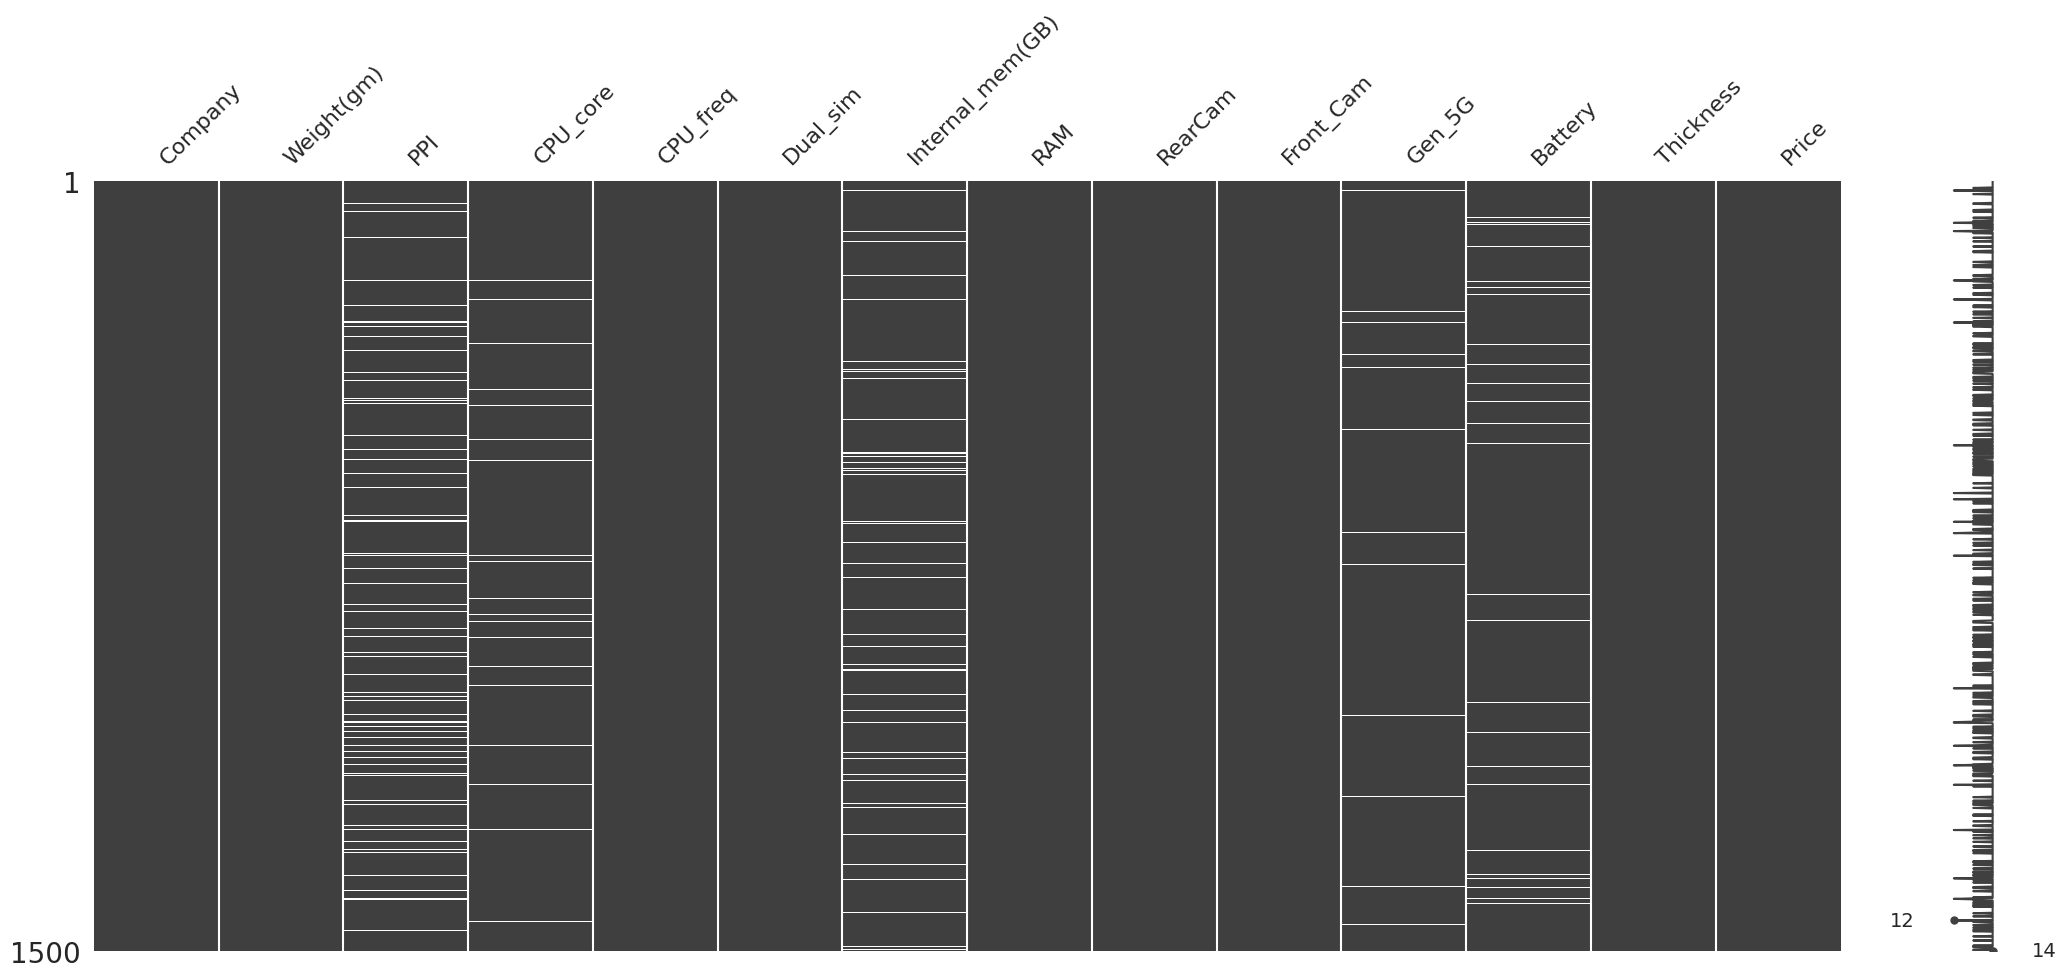

In [289]:
import missingno as msno
msno.matrix(df_merged)

In [290]:
df_merged.isnull().sum()

Company               0
Weight(gm)            0
PPI                 130
CPU_core             30
CPU_freq              0
Dual_sim              0
Internal_mem(GB)     90
RAM                   0
RearCam               0
Front_Cam             0
Gen_5G               30
Battery              50
Thickness             0
Price                 0
dtype: int64

In [291]:
df_merged

Company  Weight(gm)    PPI  CPU_core  CPU_freq  Dual_sim  \
0           9       180.0  312.0       1.0       1.5         0   
1           2       160.0  362.0       1.0       1.6         0   
2           1       160.0  241.0       1.0       1.0         0   
3           6       210.0  555.0       4.0       1.2         1   
4          11       100.0  607.0       8.0       1.8         1   
...       ...         ...    ...       ...       ...       ...   
1495        3       220.0  627.0       3.0       1.6         0   
1496        0       150.0  461.0       2.0       1.3         1   
1497       10       210.0  466.0       4.0       1.4         0   
1498        3       100.0  742.0       2.0       1.7         1   
1499       12       220.0  677.0       4.0       1.5         0   

      Internal_mem(GB)  RAM  RearCam  Front_Cam  Gen_5G  Battery  Thickness  \
0                 16.0    8       77         31     1.0   5000.0         17   
1                 64.0    8       51         13     0.0   3000.0         12   
2                 16.0   11       84         23     0.0   5000.0         11   
3                 32.0    7       91         10     0.0   6000.0          8   
4                128.0   12       71         27     0.0   4500.0         11   
...                ...  ...      ...        ...     ...      ...        ...   
1495              16.0   11       54         11     1.0   4500.0         15   
1496              32.0    4       63         25     NaN   5000.0          6   
1497               NaN    7       77         25     0.0   6000.0         13   
1498               NaN    6       43         31     0.0   3000.0          5   
1499             256.0    5       43         22     1.0   3500.0          6   

         Price  
0      60000.0  
1      53000.0  
2      70000.0  
3      67000.0  
4      41000.0  
...        ...  
1495   32000.0  
1496  101000.0  
1497   43000.0  
1498   28000.0  
1499   35000.0  

[1500 rows x 14 columns]

In [292]:
df_merged['Company'].value_counts()

2     144
0     128
4     120
9     116
10    116
11    115
12    113
1     110
8     109
6     108
3     108
5     107
7     106
Name: Company, dtype: int64

# **Imputation of missing values using various techniques**

In [293]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# # Assuming df is your DataFrame and 'Company' is the column you want to impute
# imputer_multiple = IterativeImputer(random_state=42)
# df_merged['Company'] = imputer_multiple.fit_transform(df_merged[['Company']])

In [294]:
# from sklearn.impute import KNNImputer
# imputer_knn = KNNImputer(n_neighbors=5)
# df_merged['Company'] = imputer_knn.fit_transform(df_merged[['Company']]).astype(int)
# df_merged

# Using median

In [295]:
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df_merged['Battery'] = imputer.fit_transform(df_merged[['Battery']])

df_merged

Company  Weight(gm)    PPI  CPU_core  CPU_freq  Dual_sim  \
0           9       180.0  312.0       1.0       1.5         0   
1           2       160.0  362.0       1.0       1.6         0   
2           1       160.0  241.0       1.0       1.0         0   
3           6       210.0  555.0       4.0       1.2         1   
4          11       100.0  607.0       8.0       1.8         1   
...       ...         ...    ...       ...       ...       ...   
1495        3       220.0  627.0       3.0       1.6         0   
1496        0       150.0  461.0       2.0       1.3         1   
1497       10       210.0  466.0       4.0       1.4         0   
1498        3       100.0  742.0       2.0       1.7         1   
1499       12       220.0  677.0       4.0       1.5         0   

      Internal_mem(GB)  RAM  RearCam  Front_Cam  Gen_5G  Battery  Thickness  \
0                 16.0    8       77         31     1.0   5000.0         17   
1                 64.0    8       51         13     0.0   3000.0         12   
2                 16.0   11       84         23     0.0   5000.0         11   
3                 32.0    7       91         10     0.0   6000.0          8   
4                128.0   12       71         27     0.0   4500.0         11   
...                ...  ...      ...        ...     ...      ...        ...   
1495              16.0   11       54         11     1.0   4500.0         15   
1496              32.0    4       63         25     NaN   5000.0          6   
1497               NaN    7       77         25     0.0   6000.0         13   
1498               NaN    6       43         31     0.0   3000.0          5   
1499             256.0    5       43         22     1.0   3500.0          6   

         Price  
0      60000.0  
1      53000.0  
2      70000.0  
3      67000.0  
4      41000.0  
...        ...  
1495   32000.0  
1496  101000.0  
1497   43000.0  
1498   28000.0  
1499   35000.0  

[1500 rows x 14 columns]

# Using Mode

In [296]:
imputer = SimpleImputer(strategy='most_frequent')
df_merged['Internal_mem(GB)'] = imputer.fit_transform(df_merged[['Internal_mem(GB)']])
df_merged

Company  Weight(gm)    PPI  CPU_core  CPU_freq  Dual_sim  \
0           9       180.0  312.0       1.0       1.5         0   
1           2       160.0  362.0       1.0       1.6         0   
2           1       160.0  241.0       1.0       1.0         0   
3           6       210.0  555.0       4.0       1.2         1   
4          11       100.0  607.0       8.0       1.8         1   
...       ...         ...    ...       ...       ...       ...   
1495        3       220.0  627.0       3.0       1.6         0   
1496        0       150.0  461.0       2.0       1.3         1   
1497       10       210.0  466.0       4.0       1.4         0   
1498        3       100.0  742.0       2.0       1.7         1   
1499       12       220.0  677.0       4.0       1.5         0   

      Internal_mem(GB)  RAM  RearCam  Front_Cam  Gen_5G  Battery  Thickness  \
0                 16.0    8       77         31     1.0   5000.0         17   
1                 64.0    8       51         13     0.0   3000.0         12   
2                 16.0   11       84         23     0.0   5000.0         11   
3                 32.0    7       91         10     0.0   6000.0          8   
4                128.0   12       71         27     0.0   4500.0         11   
...                ...  ...      ...        ...     ...      ...        ...   
1495              16.0   11       54         11     1.0   4500.0         15   
1496              32.0    4       63         25     NaN   5000.0          6   
1497              16.0    7       77         25     0.0   6000.0         13   
1498              16.0    6       43         31     0.0   3000.0          5   
1499             256.0    5       43         22     1.0   3500.0          6   

         Price  
0      60000.0  
1      53000.0  
2      70000.0  
3      67000.0  
4      41000.0  
...        ...  
1495   32000.0  
1496  101000.0  
1497   43000.0  
1498   28000.0  
1499   35000.0  

[1500 rows x 14 columns]

# Using Knn

In [297]:
from sklearn.impute import KNNImputer
imputer_knn = KNNImputer(n_neighbors=5)
df_merged['PPI'] = imputer_knn.fit_transform(df_merged[['PPI']]).astype(int)
df_merged

Company  Weight(gm)  PPI  CPU_core  CPU_freq  Dual_sim  \
0           9       180.0  312       1.0       1.5         0   
1           2       160.0  362       1.0       1.6         0   
2           1       160.0  241       1.0       1.0         0   
3           6       210.0  555       4.0       1.2         1   
4          11       100.0  607       8.0       1.8         1   
...       ...         ...  ...       ...       ...       ...   
1495        3       220.0  627       3.0       1.6         0   
1496        0       150.0  461       2.0       1.3         1   
1497       10       210.0  466       4.0       1.4         0   
1498        3       100.0  742       2.0       1.7         1   
1499       12       220.0  677       4.0       1.5         0   

      Internal_mem(GB)  RAM  RearCam  Front_Cam  Gen_5G  Battery  Thickness  \
0                 16.0    8       77         31     1.0   5000.0         17   
1                 64.0    8       51         13     0.0   3000.0         12   
2                 16.0   11       84         23     0.0   5000.0         11   
3                 32.0    7       91         10     0.0   6000.0          8   
4                128.0   12       71         27     0.0   4500.0         11   
...                ...  ...      ...        ...     ...      ...        ...   
1495              16.0   11       54         11     1.0   4500.0         15   
1496              32.0    4       63         25     NaN   5000.0          6   
1497              16.0    7       77         25     0.0   6000.0         13   
1498              16.0    6       43         31     0.0   3000.0          5   
1499             256.0    5       43         22     1.0   3500.0          6   

         Price  
0      60000.0  
1      53000.0  
2      70000.0  
3      67000.0  
4      41000.0  
...        ...  
1495   32000.0  
1496  101000.0  
1497   43000.0  
1498   28000.0  
1499   35000.0  

[1500 rows x 14 columns]

# Multivariate feature imputation

In [298]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
mice_imputer = IterativeImputer(random_state=0)
df_merged['CPU_core'] = mice_imputer.fit_transform(df_merged[['CPU_core']]).astype(int)
df_merged

Company  Weight(gm)  PPI  CPU_core  CPU_freq  Dual_sim  \
0           9       180.0  312         1       1.5         0   
1           2       160.0  362         1       1.6         0   
2           1       160.0  241         1       1.0         0   
3           6       210.0  555         4       1.2         1   
4          11       100.0  607         8       1.8         1   
...       ...         ...  ...       ...       ...       ...   
1495        3       220.0  627         3       1.6         0   
1496        0       150.0  461         2       1.3         1   
1497       10       210.0  466         4       1.4         0   
1498        3       100.0  742         2       1.7         1   
1499       12       220.0  677         4       1.5         0   

      Internal_mem(GB)  RAM  RearCam  Front_Cam  Gen_5G  Battery  Thickness  \
0                 16.0    8       77         31     1.0   5000.0         17   
1                 64.0    8       51         13     0.0   3000.0         12   
2                 16.0   11       84         23     0.0   5000.0         11   
3                 32.0    7       91         10     0.0   6000.0          8   
4                128.0   12       71         27     0.0   4500.0         11   
...                ...  ...      ...        ...     ...      ...        ...   
1495              16.0   11       54         11     1.0   4500.0         15   
1496              32.0    4       63         25     NaN   5000.0          6   
1497              16.0    7       77         25     0.0   6000.0         13   
1498              16.0    6       43         31     0.0   3000.0          5   
1499             256.0    5       43         22     1.0   3500.0          6   

         Price  
0      60000.0  
1      53000.0  
2      70000.0  
3      67000.0  
4      41000.0  
...        ...  
1495   32000.0  
1496  101000.0  
1497   43000.0  
1498   28000.0  
1499   35000.0  

[1500 rows x 14 columns]

In [299]:
df_merged['CPU_core'].value_counts()

1    219
6    199
4    196
7    190
2    180
3    178
8    175
5    163
Name: CPU_core, dtype: int64

In [300]:
df_merged['Gen_5G'] = df_merged['Gen_5G'].fillna(method='bfill')

In [301]:
df_merged.isnull().sum()

Company             0
Weight(gm)          0
PPI                 0
CPU_core            0
CPU_freq            0
Dual_sim            0
Internal_mem(GB)    0
RAM                 0
RearCam             0
Front_Cam           0
Gen_5G              0
Battery             0
Thickness           0
Price               0
dtype: int64

<Axes: >

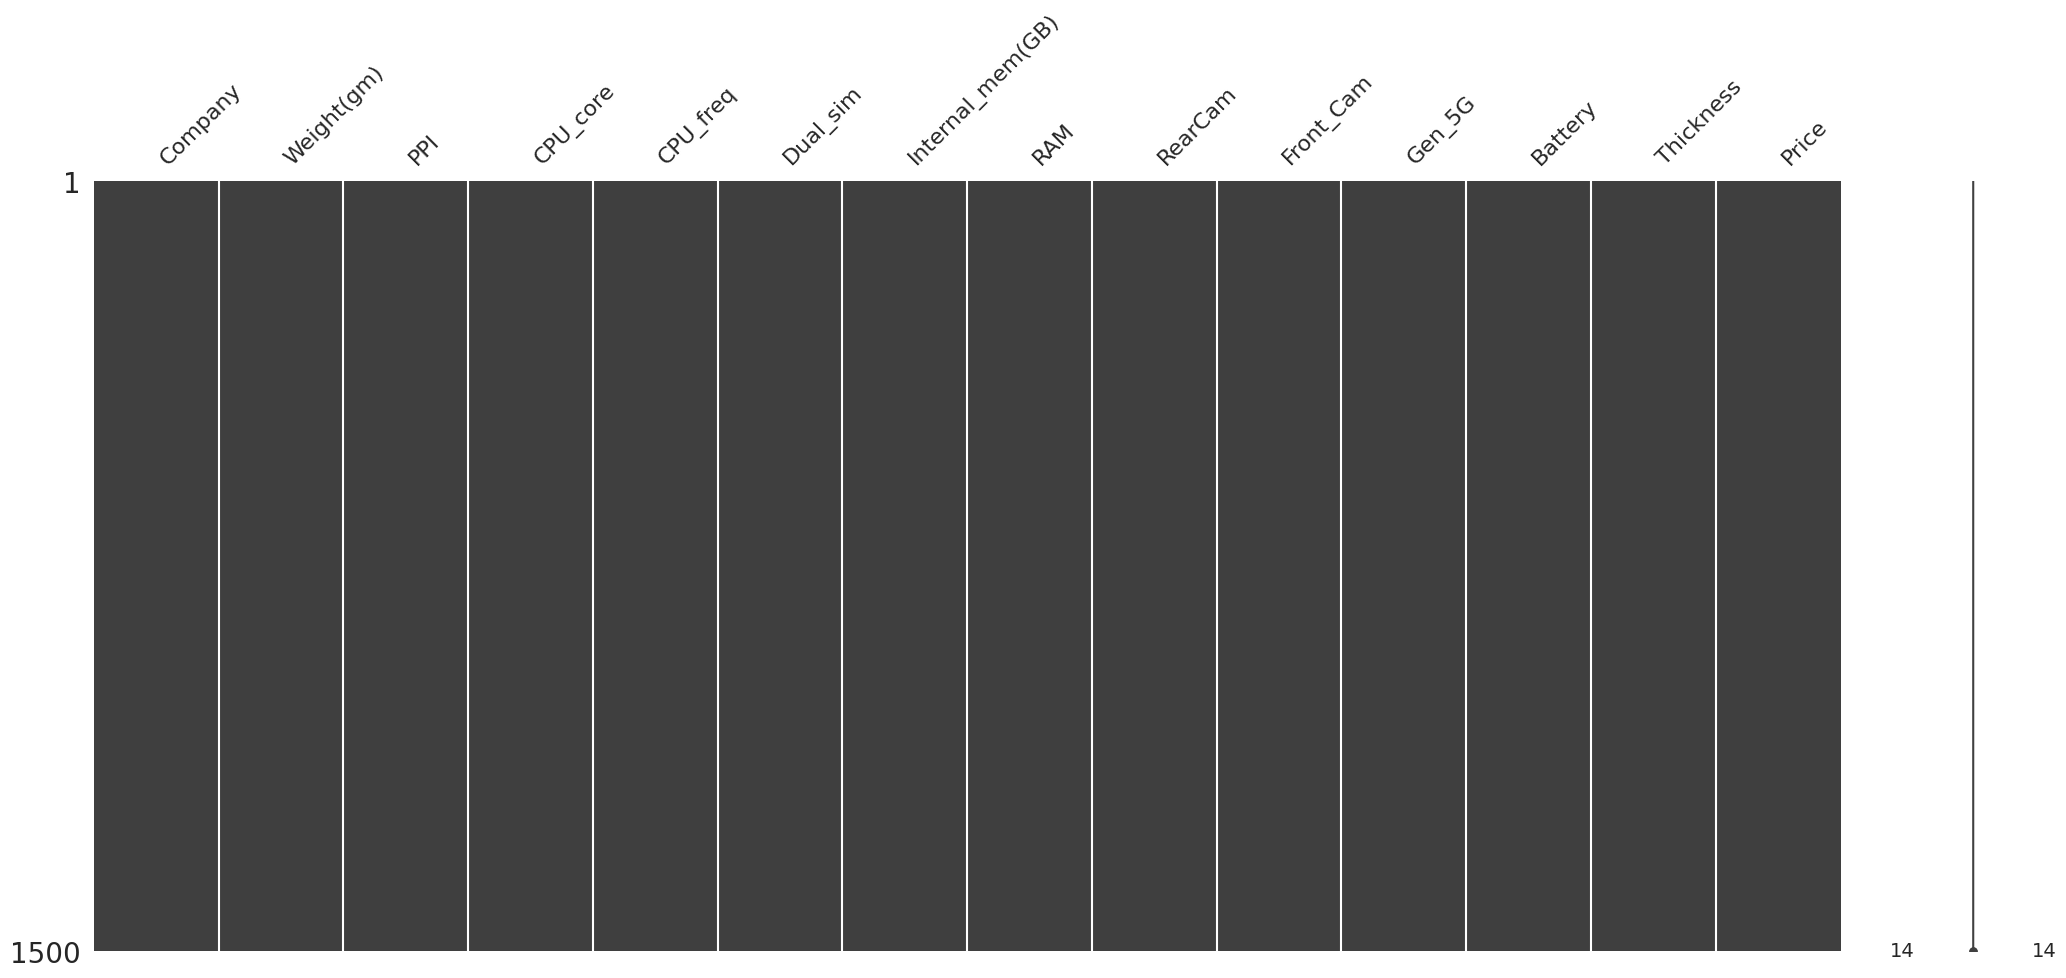

In [302]:
msno.matrix(df_merged)

In [303]:
df_merged.corr()

Company  Weight(gm)       PPI  CPU_core  CPU_freq  \
Company           1.000000   -0.033894 -0.035367 -0.001696 -0.043763   
Weight(gm)       -0.033894    1.000000 -0.024519  0.044470 -0.004677   
PPI              -0.035367   -0.024519  1.000000  0.024396  0.055434   
CPU_core         -0.001696    0.044470  0.024396  1.000000 -0.008669   
CPU_freq         -0.043763   -0.004677  0.055434 -0.008669  1.000000   
Dual_sim         -0.016431    0.008557  0.019944 -0.003378 -0.007419   
Internal_mem(GB)  0.007243    0.017536  0.003930  0.002807  0.037610   
RAM               0.024401   -0.025259  0.019059  0.005788  0.047505   
RearCam          -0.026918    0.027723  0.025406  0.009979 -0.038035   
Front_Cam         0.013403    0.042453  0.042920  0.023586 -0.002926   
Gen_5G           -0.014889    0.021557  0.031871  0.018104 -0.014477   
Battery          -0.001666    0.023796 -0.008695  0.016072  0.005073   
Thickness         0.037313    0.011519  0.018738  0.019412 -0.035592   
Price            -0.556091    0.034972  0.056383  0.039368  0.005700   

                  Dual_sim  Internal_mem(GB)       RAM   RearCam  Front_Cam  \
Company          -0.016431          0.007243  0.024401 -0.026918   0.013403   
Weight(gm)        0.008557          0.017536 -0.025259  0.027723   0.042453   
PPI               0.019944          0.003930  0.019059  0.025406   0.042920   
CPU_core         -0.003378          0.002807  0.005788  0.009979   0.023586   
CPU_freq         -0.007419          0.037610  0.047505 -0.038035  -0.002926   
Dual_sim          1.000000         -0.023921 -0.010760  0.027898   0.007459   
Internal_mem(GB) -0.023921          1.000000  0.054864 -0.021540  -0.006787   
RAM              -0.010760          0.054864  1.000000 -0.034495  -0.033373   
RearCam           0.027898         -0.021540 -0.034495  1.000000  -0.043369   
Front_Cam         0.007459         -0.006787 -0.033373 -0.043369   1.000000   
Gen_5G           -0.007012          0.029458  0.014478  0.015769   0.032820   
Battery          -0.027663         -0.037936  0.047197  0.003270  -0.033193   
Thickness        -0.035409          0.016175  0.046950  0.026683   0.024301   
Price             0.050466          0.054010  0.056190  0.042059   0.006234   

                    Gen_5G   Battery  Thickness     Price  
Company          -0.014889 -0.001666   0.037313 -0.556091  
Weight(gm)        0.021557  0.023796   0.011519  0.034972  
PPI               0.031871 -0.008695   0.018738  0.056383  
CPU_core          0.018104  0.016072   0.019412  0.039368  
CPU_freq         -0.014477  0.005073  -0.035592  0.005700  
Dual_sim         -0.007012 -0.027663  -0.035409  0.050466  
Internal_mem(GB)  0.029458 -0.037936   0.016175  0.054010  
RAM               0.014478  0.047197   0.046950  0.056190  
RearCam           0.015769  0.003270   0.026683  0.042059  
Front_Cam         0.032820 -0.033193   0.024301  0.006234  
Gen_5G            1.000000  0.052340   0.009293  0.078342  
Battery           0.052340  1.000000  -0.037837  0.048829  
Thickness         0.009293 -0.037837   1.000000 -0.001714  
Price             0.078342  0.048829  -0.001714  1.000000

In [304]:
df_merged['Internal_mem(GB)'].value_counts()

16.0     387
64.0     290
128.0    289
256.0    283
32.0     251
Name: Internal_mem(GB), dtype: int64

In [305]:
df_merged['Battery'].value_counts()

5000.0    234
4500.0    224
5500.0    215
6000.0    213
4000.0    208
3000.0    204
3500.0    202
Name: Battery, dtype: int64

# Data Quality

In [306]:
import pandas as pd
duplicate_rows = df_merged[df_merged.duplicated()]
duplicate_rows.shape

(0, 14)

So there are no duplicates

# HeatMap

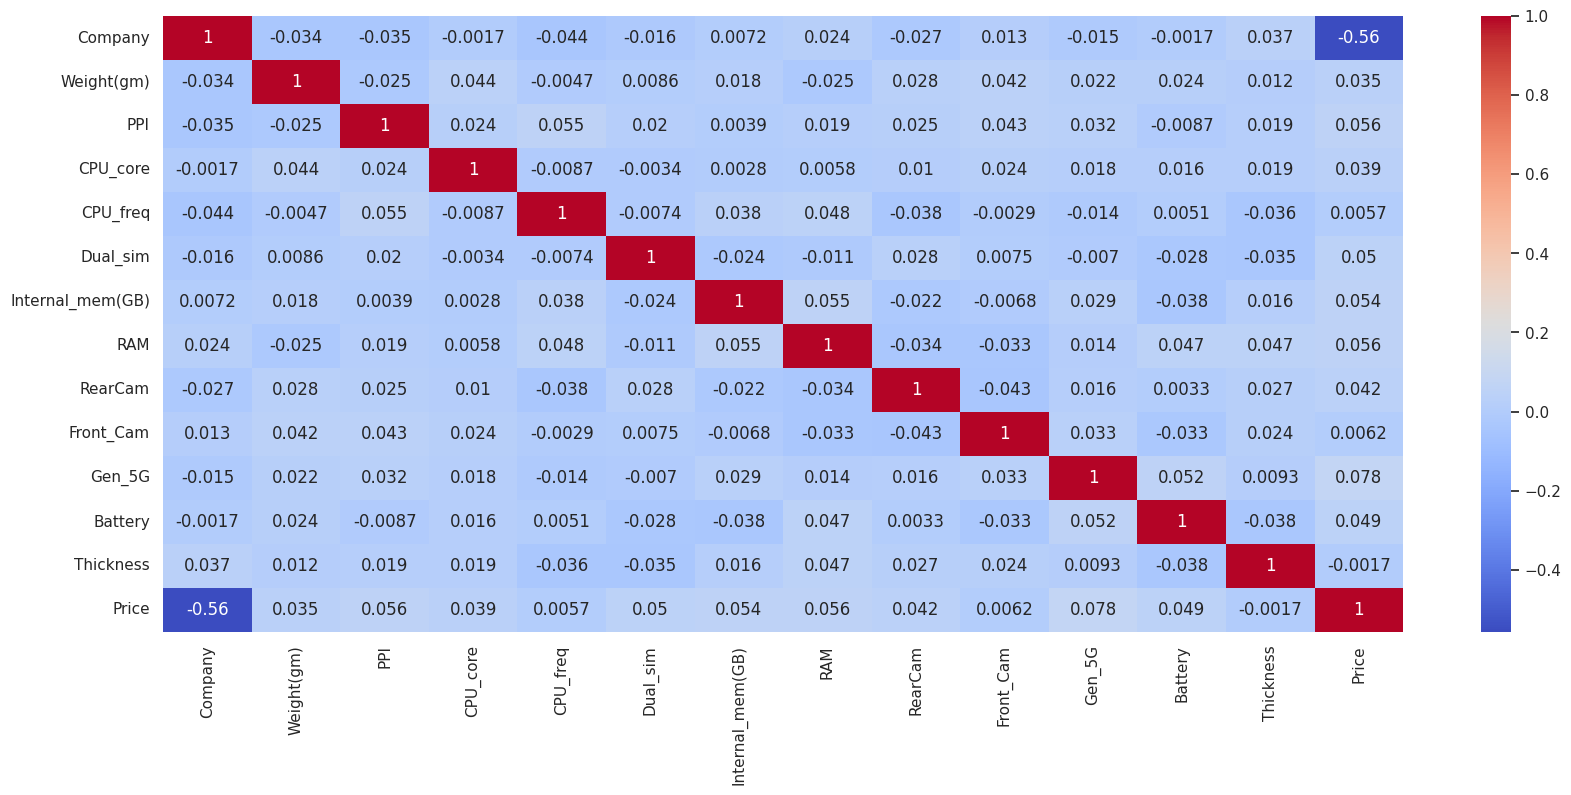

In [307]:
plt.figure(figsize=(20, 8))
correlation_matrix = df_merged.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Data Skewness

In [308]:
numeric_columns = df_merged.select_dtypes(include=['float64', 'int']).columns
skewness = df_merged[numeric_columns].apply(lambda x: x.skew())
print(skewness)

Company             0.040592
Weight(gm)         -0.052652
PPI                 0.015320
CPU_core            0.009454
CPU_freq           -0.017846
Dual_sim           -0.074794
Internal_mem(GB)    0.949655
RAM                -0.025163
RearCam             0.025589
Front_Cam          -0.022150
Gen_5G              0.053406
Battery            -0.047799
Thickness           0.019966
Price               1.057614
dtype: float64


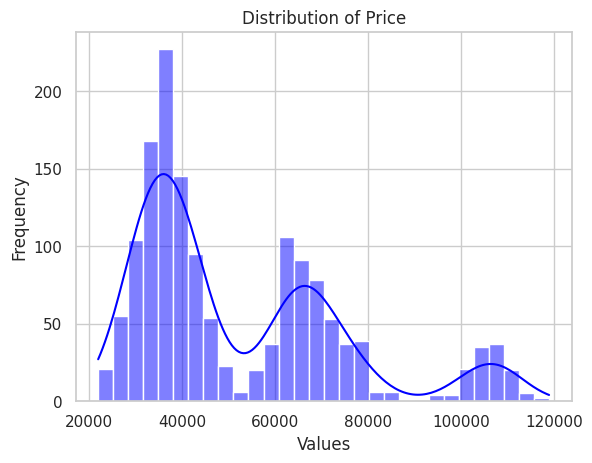

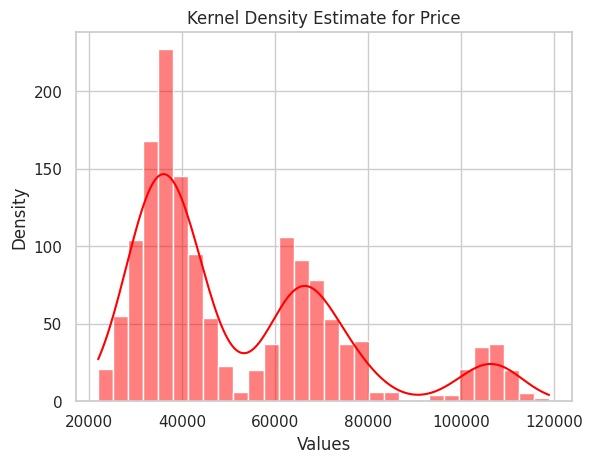

In [309]:
columns_to_analyze = ["Price"]
for column in columns_to_analyze:
    sns.histplot(df_merged[column], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

    sns.histplot(df_merged[column], kde=True, color='red', bins=30)
    plt.title(f'Kernel Density Estimate for {column}')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.show()

In [310]:
dfcopy = df_merged.copy()

# Skneness after Transformation

In [311]:
columns_to_analyze = ["Price"]
for column in columns_to_analyze:
  df_merged[column] = df_merged[column].apply(lambda x: np.log1p(x) if x > 0 else 0)
  transformed_skewness = df_merged[column].skew()
  print(f"Skewness after transformation for {column}: {transformed_skewness}")

Skewness after transformation for Price: 0.4522692673157849


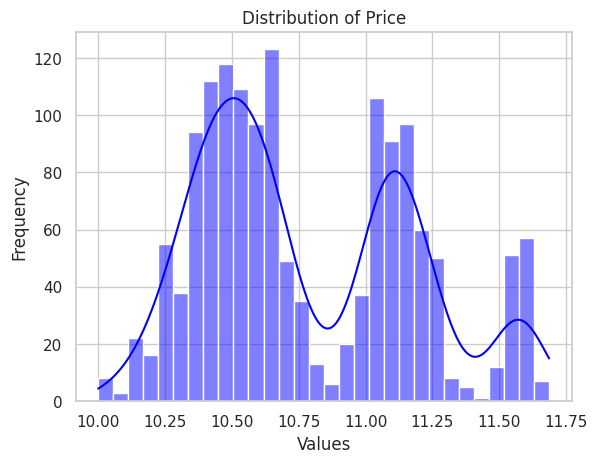

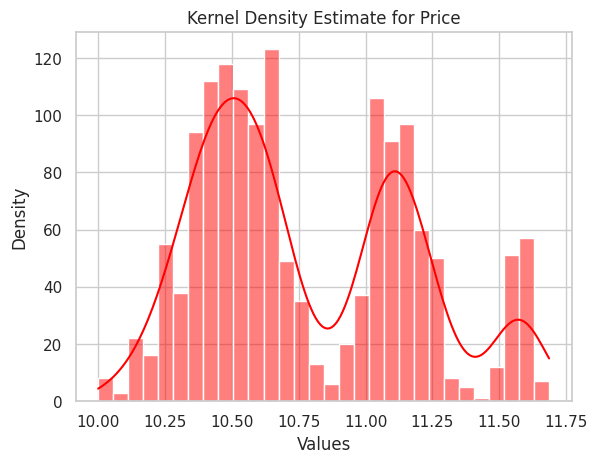

In [312]:
columns_to_analyze = ["Price"]
for column in columns_to_analyze:
    sns.histplot(df_merged[column], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

    sns.histplot(df_merged[column], kde=True, color='red', bins=30)
    plt.title(f'Kernel Density Estimate for {column}')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.show()

# Normalization

In [313]:
df_Normalize=df_merged.copy()

In [314]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['Price']
scaler = MinMaxScaler()
df_Normalize[columns_to_normalize] = scaler.fit_transform(df_Normalize[columns_to_normalize])
df_Normalize.head(n=3)

Company  Weight(gm)  PPI  CPU_core  CPU_freq  Dual_sim  Internal_mem(GB)  \
0        9       180.0  312         1       1.5         0              16.0   
1        2       160.0  362         1       1.6         0              64.0   
2        1       160.0  241         1       1.0         0              16.0   

   RAM  RearCam  Front_Cam  Gen_5G  Battery  Thickness     Price  
0    8       77         31     1.0   5000.0         17  0.594341  
1    8       51         13     0.0   3000.0         12  0.520853  
2   11       84         23     0.0   5000.0         11  0.685658

In [315]:
df_merged=df_Normalize.copy()

# **Binning**

In [316]:
import pandas as pd
column_name = 'Price'
num_bins = 10

df_Normalize['Binned_Column'] = pd.cut(df_Normalize[column_name], bins=num_bins, labels=False)

binned_means = df_Normalize.groupby('Binned_Column')[column_name].mean()
binned_medians = df_Normalize.groupby('Binned_Column')[column_name].median()

df_Normalize['Binned_Column_Means'] = df_Normalize['Binned_Column'].map(binned_means)
df_Normalize['Binned_Column_Medians'] = df_Normalize['Binned_Column'].map(binned_medians)

df_Normalize[['Binned_Column', 'Binned_Column_Means', 'Binned_Column_Medians', column_name]]

Binned_Column  Binned_Column_Means  Binned_Column_Medians     Price
0                 5             0.570393               0.574258  0.594341
1                 5             0.570393               0.574258  0.520853
2                 6             0.649945               0.650802  0.685658
3                 6             0.649945               0.650802  0.659710
4                 3             0.348768               0.354147  0.368775
...             ...                  ...                    ...       ...
1495              2             0.250888               0.257874  0.221961
1496              9             0.937023               0.937031  0.902845
1497              3             0.348768               0.354147  0.396989
1498              1             0.159285               0.163646  0.142859
1499              2             0.250888               0.257874  0.275045

[1500 rows x 4 columns]

# Equi width

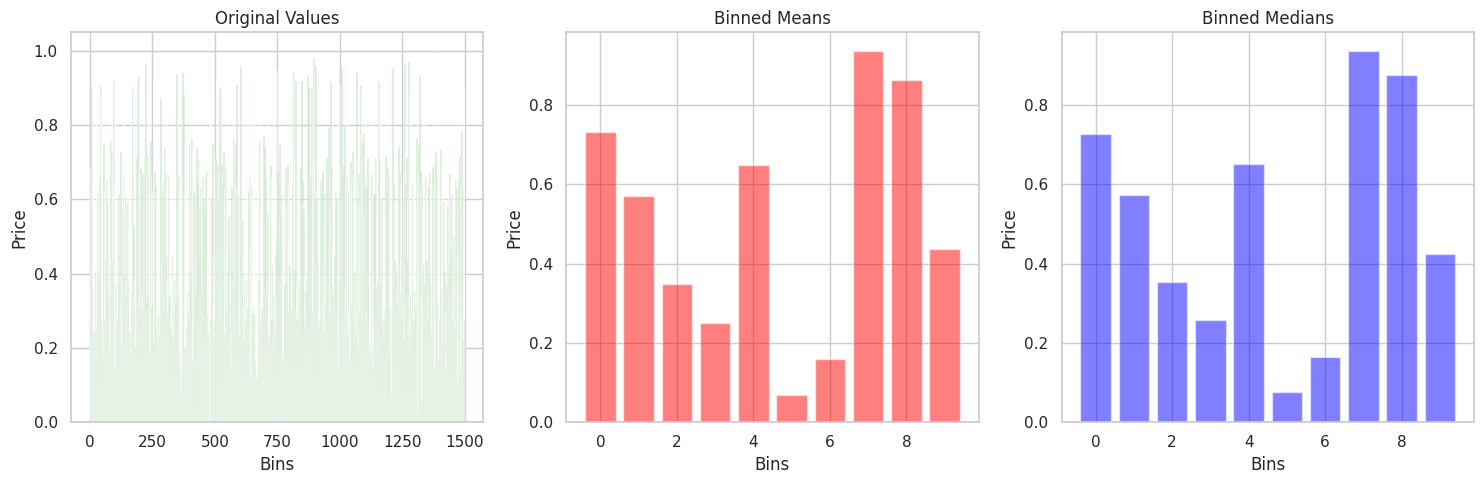

In [317]:
import pandas as pd
import matplotlib.pyplot as plt

column_name = 'Price'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Original column values
axes[0].bar(df_Normalize.index, df_Normalize[column_name], color='green', alpha=0.5)
axes[0].set_title('Original Values')

# Binned means
axes[1].bar(df_Normalize['Binned_Column'].unique(), df_Normalize.groupby('Binned_Column')[column_name].mean(), color='red', alpha=0.5)
axes[1].set_title('Binned Means')

# Binned medians
axes[2].bar(df_Normalize['Binned_Column'].unique(), df_Normalize.groupby('Binned_Column')[column_name].median(), color='blue', alpha=0.5)
axes[2].set_title('Binned Medians')

# Set common labels
for ax in axes:
    ax.set_xlabel('Bins')
    ax.set_ylabel(column_name)

plt.tight_layout()
plt.show()

# Equi depth

In [318]:
import pandas as pd
column_name = 'Price'
num_bins = 5
# Calculate bin edges using pandas' qcut function
df_Normalize['EquiDepth_Binned_Column'], bin_edges = pd.qcut(df_Normalize[column_name], q=num_bins, retbins=True, labels=False)
print("Bin Edges:", bin_edges)
df_Normalize[['EquiDepth_Binned_Column', column_name]].head()

Bin Edges: [0.         0.24018921 0.33914956 0.54279596 0.67713466 1.        ]


EquiDepth_Binned_Column     Price
0                        3  0.594341
1                        2  0.520853
2                        4  0.685658
3                        3  0.659710
4                        2  0.368775

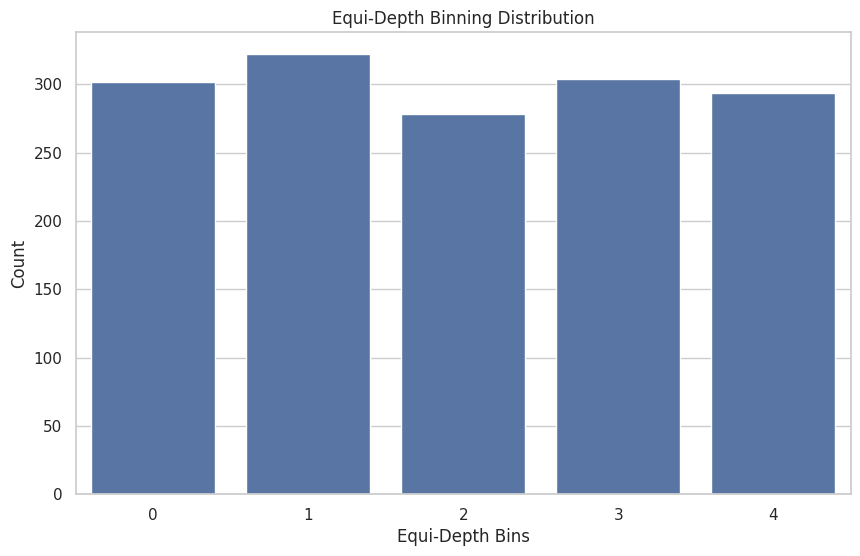

In [319]:
sns.set(style="whitegrid")
# Create a bar plot to visualize the distribution of the equi-depth bins
plt.figure(figsize=(10, 6))
sns.countplot(x='EquiDepth_Binned_Column', data=df_Normalize)
plt.xlabel('Equi-Depth Bins')
plt.ylabel('Count')
plt.title('Equi-Depth Binning Distribution')
plt.show()

In [320]:
df_Normalize.drop('Binned_Column', axis=1, inplace=True)
df_Normalize.drop('Binned_Column_Means', axis=1, inplace=True)
df_Normalize.drop('Binned_Column_Medians', axis=1, inplace=True)
df_Normalize.drop('EquiDepth_Binned_Column', axis=1, inplace=True)

# **Outlier** **Detection**

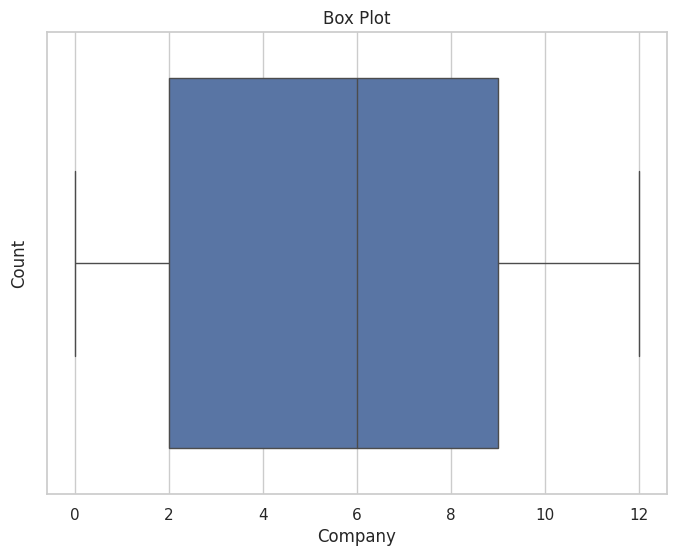

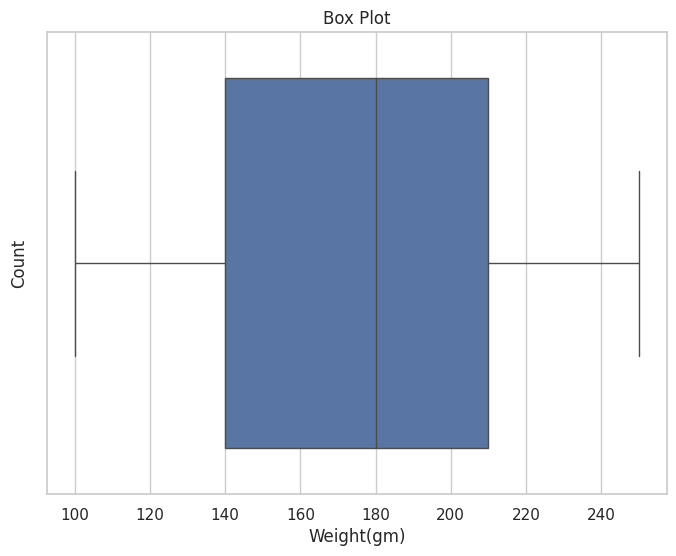

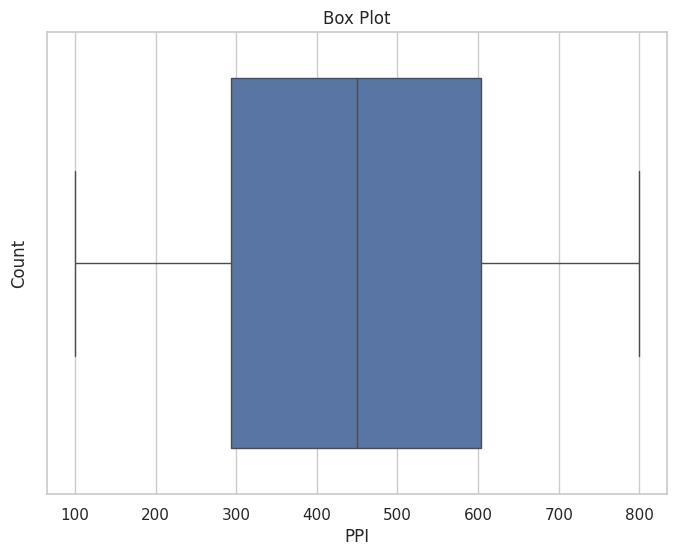

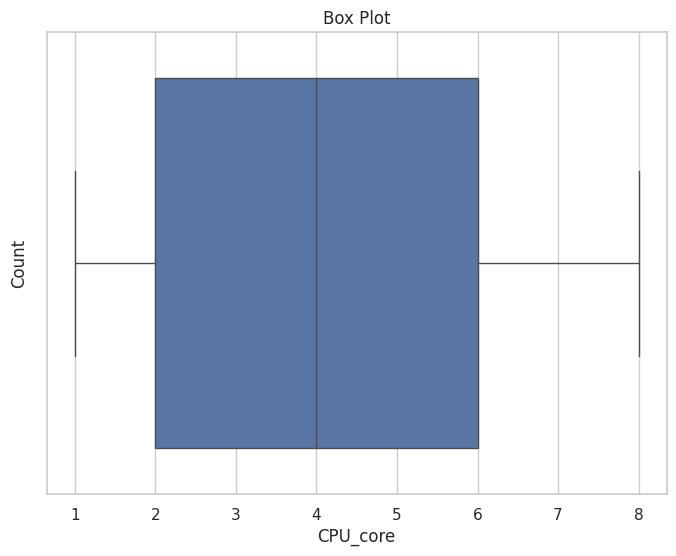

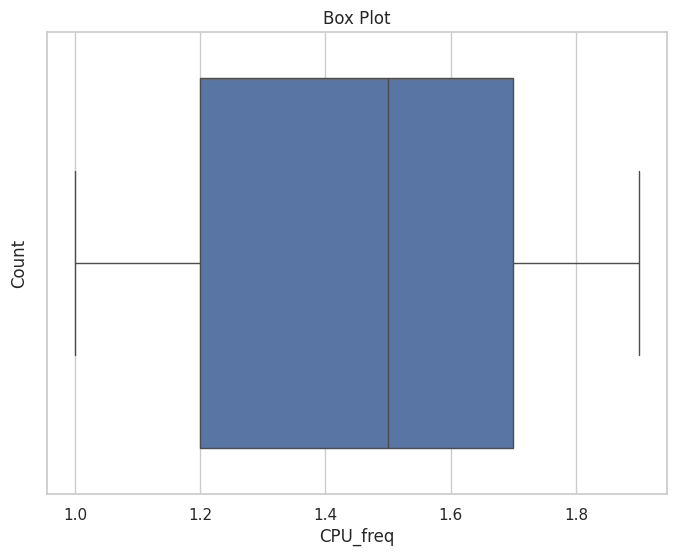

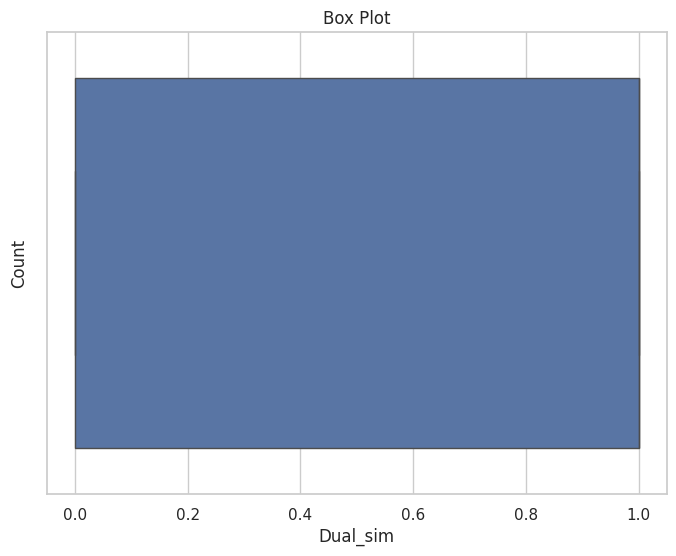

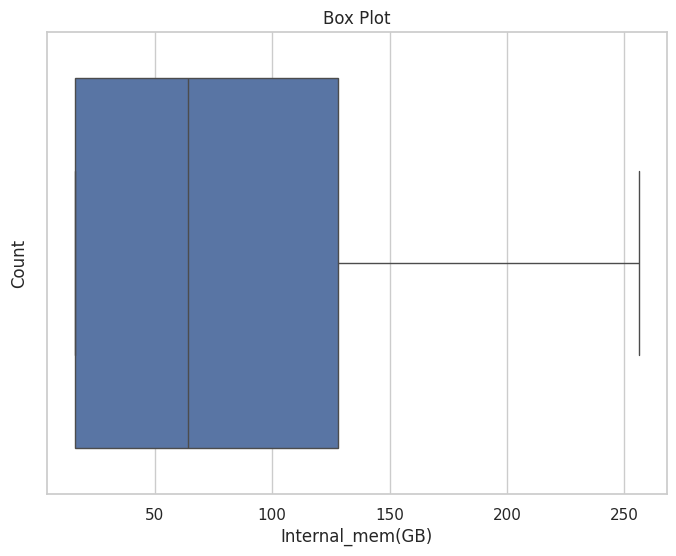

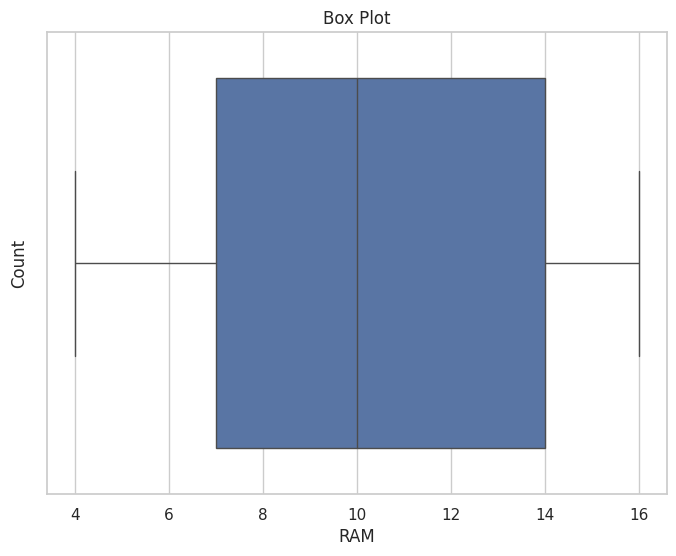

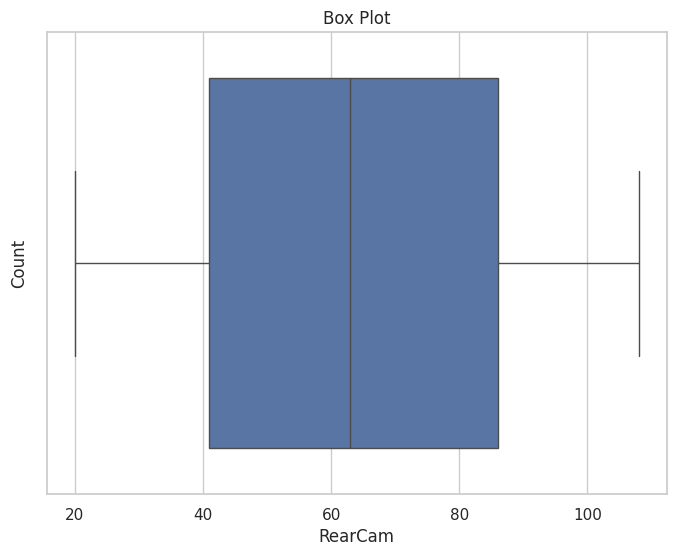

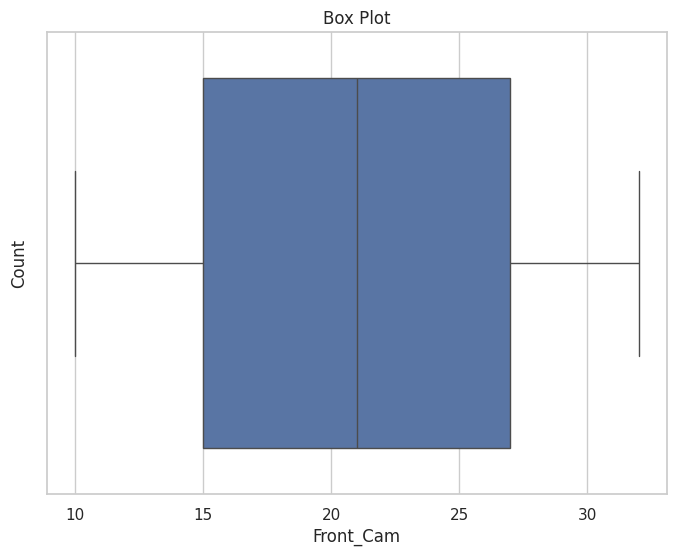

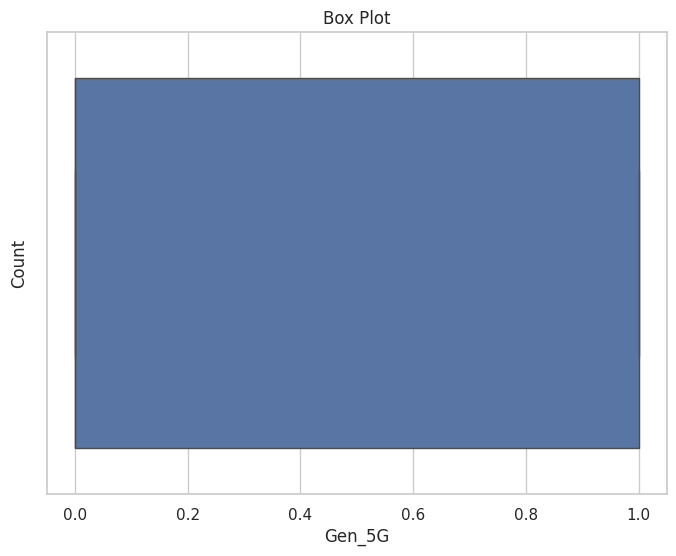

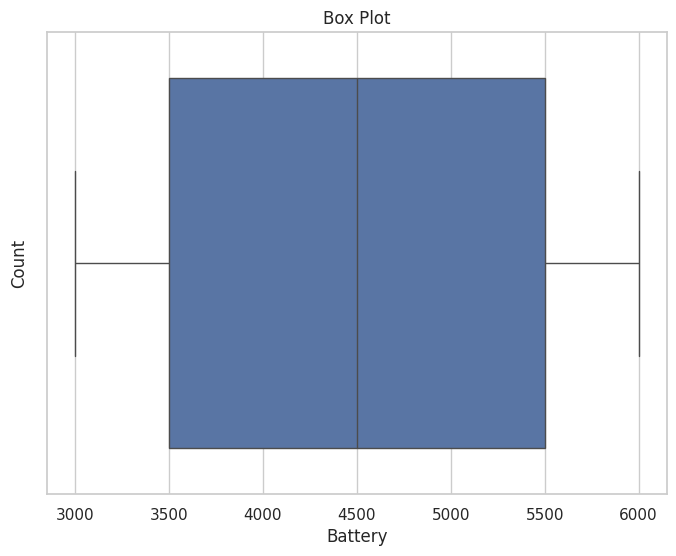

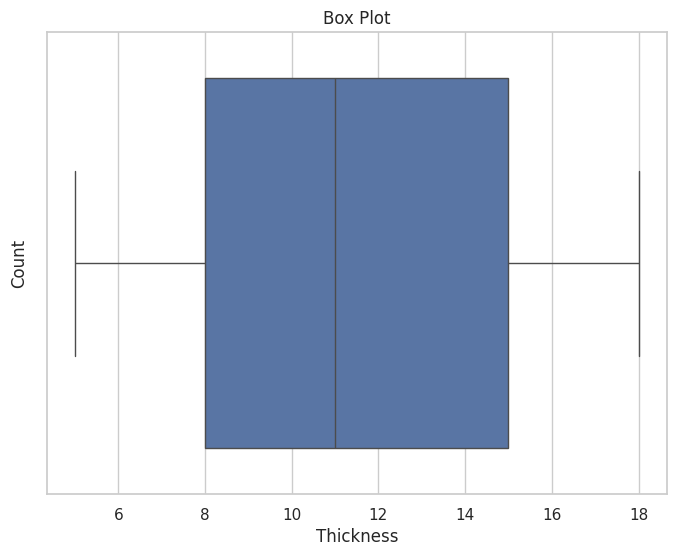

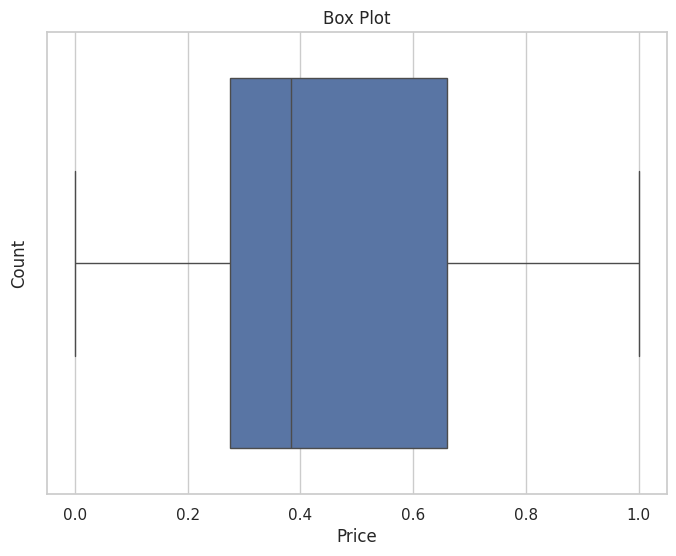

In [321]:
for column in df_merged.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=column, data=df_Normalize)
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.title('Box Plot')
  plt.show()

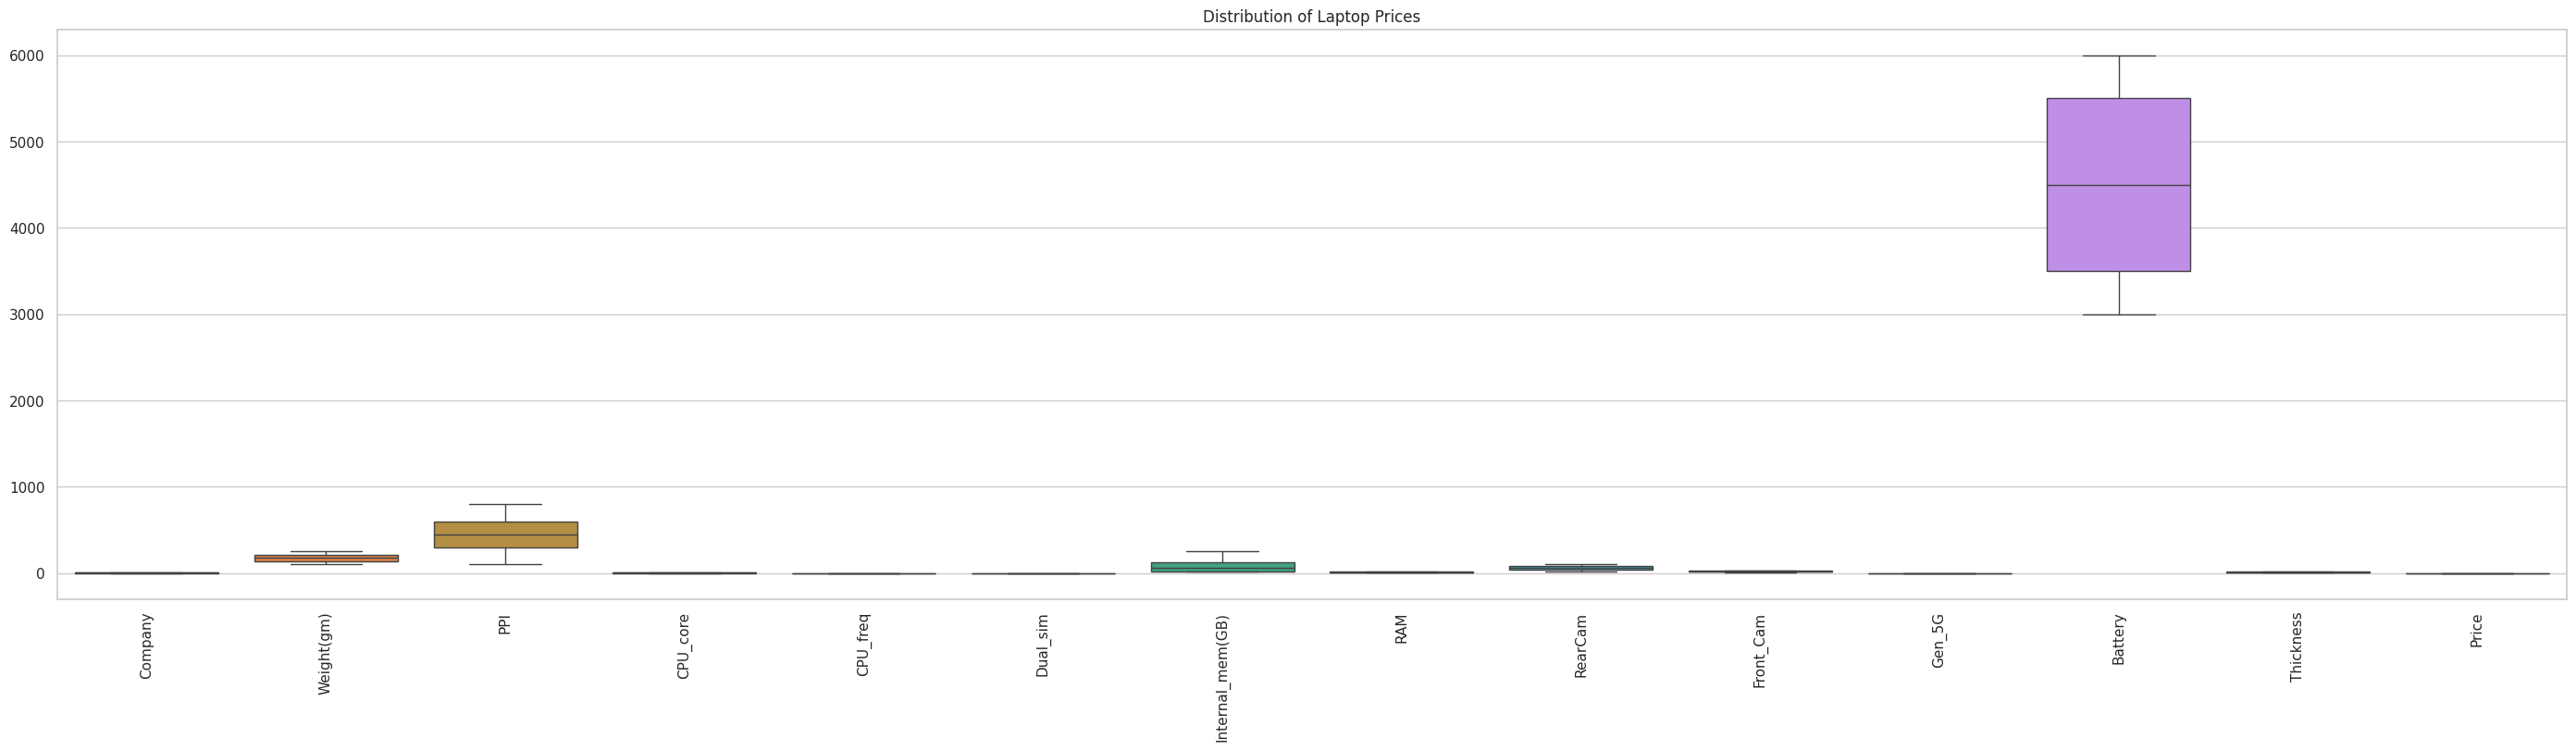

In [322]:
plt.figure(figsize=(35, 8))
sns.boxplot(data=df_Normalize)
plt.title('Distribution of Laptop Prices')
plt.xticks(rotation='vertical')
plt.show()

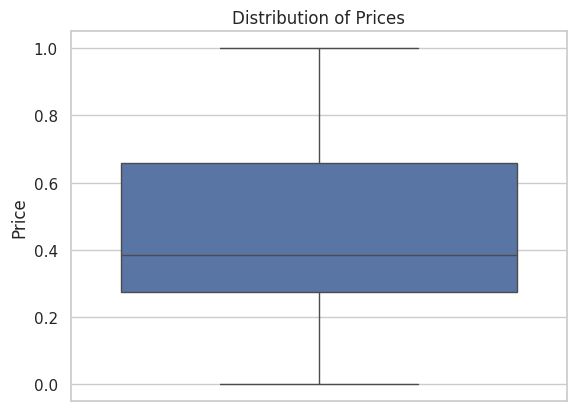

In [323]:
sns.boxplot(data=df_Normalize, y='Price')
plt.title('Distribution of Prices')
plt.show()

In [324]:
max_weight = df_merged['Weight(gm)'].max()
min_weight = df_merged['Weight(gm)'].min()

print(f"Maximum Weight: {max_weight}")
print(f"Minimum Weight: {min_weight}")

Maximum Weight: 250.0
Minimum Weight: 100.0


# Outlair detection for Price (target Column) using IQR Method

In [325]:
columns_with_outliers = ['Price']

def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

IQRout_dataset = remove_outliers_iqr(df_Normalize, columns_with_outliers)

Outliers:
Series([], Name: Price, dtype: float64)


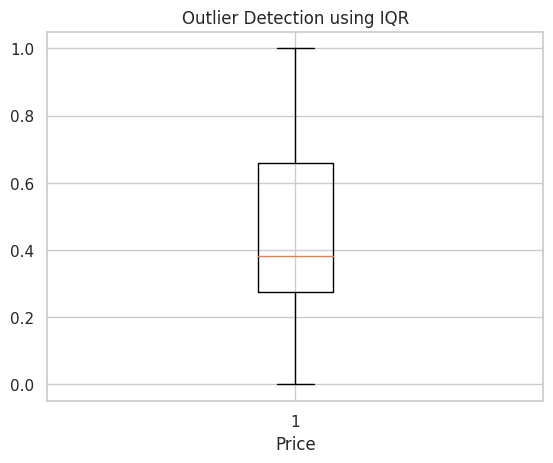

In [326]:
import pandas as pd
import matplotlib.pyplot as plt

p_column = df_Normalize['Price']
Q1 = p_column.quantile(0.25)
Q3 = p_column.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_merged[(p_column < lower_bound) | (p_column > upper_bound)]
# Display the outliers
print("Outliers:")
print(outliers['Price'])

plt.boxplot(p_column)
plt.xlabel('Price')
plt.title('Outlier Detection using IQR')
plt.show()

# Removing Outliars using Z_score method by Setting threshold Value

In [327]:
from scipy.stats import zscore
z_scores = zscore(df_merged)
abs_z_scores = np.abs(z_scores)
threshold = 2.5
df_no_outliers2 = df_Normalize[(abs_z_scores < threshold).all(axis=1)]
df_no_outliers2

Company  Weight(gm)  PPI  CPU_core  CPU_freq  Dual_sim  \
0           9       180.0  312         1       1.5         0   
1           2       160.0  362         1       1.6         0   
2           1       160.0  241         1       1.0         0   
3           6       210.0  555         4       1.2         1   
4          11       100.0  607         8       1.8         1   
...       ...         ...  ...       ...       ...       ...   
1495        3       220.0  627         3       1.6         0   
1496        0       150.0  461         2       1.3         1   
1497       10       210.0  466         4       1.4         0   
1498        3       100.0  742         2       1.7         1   
1499       12       220.0  677         4       1.5         0   

      Internal_mem(GB)  RAM  RearCam  Front_Cam  Gen_5G  Battery  Thickness  \
0                 16.0    8       77         31     1.0   5000.0         17   
1                 64.0    8       51         13     0.0   3000.0         12   
2                 16.0   11       84         23     0.0   5000.0         11   
3                 32.0    7       91         10     0.0   6000.0          8   
4                128.0   12       71         27     0.0   4500.0         11   
...                ...  ...      ...        ...     ...      ...        ...   
1495              16.0   11       54         11     1.0   4500.0         15   
1496              32.0    4       63         25     0.0   5000.0          6   
1497              16.0    7       77         25     0.0   6000.0         13   
1498              16.0    6       43         31     0.0   3000.0          5   
1499             256.0    5       43         22     1.0   3500.0          6   

         Price  
0     0.594341  
1     0.520853  
2     0.685658  
3     0.659710  
4     0.368775  
...        ...  
1495  0.221961  
1496  0.902845  
1497  0.396989  
1498  0.142859  
1499  0.275045  

[1500 rows x 14 columns]

In [328]:
df_no_outliers2.shape

(1500, 14)

In [329]:
df_no_outliers2['Company'].value_counts()

2     144
0     128
4     120
9     116
10    116
11    115
12    113
1     110
8     109
6     108
3     108
5     107
7     106
Name: Company, dtype: int64

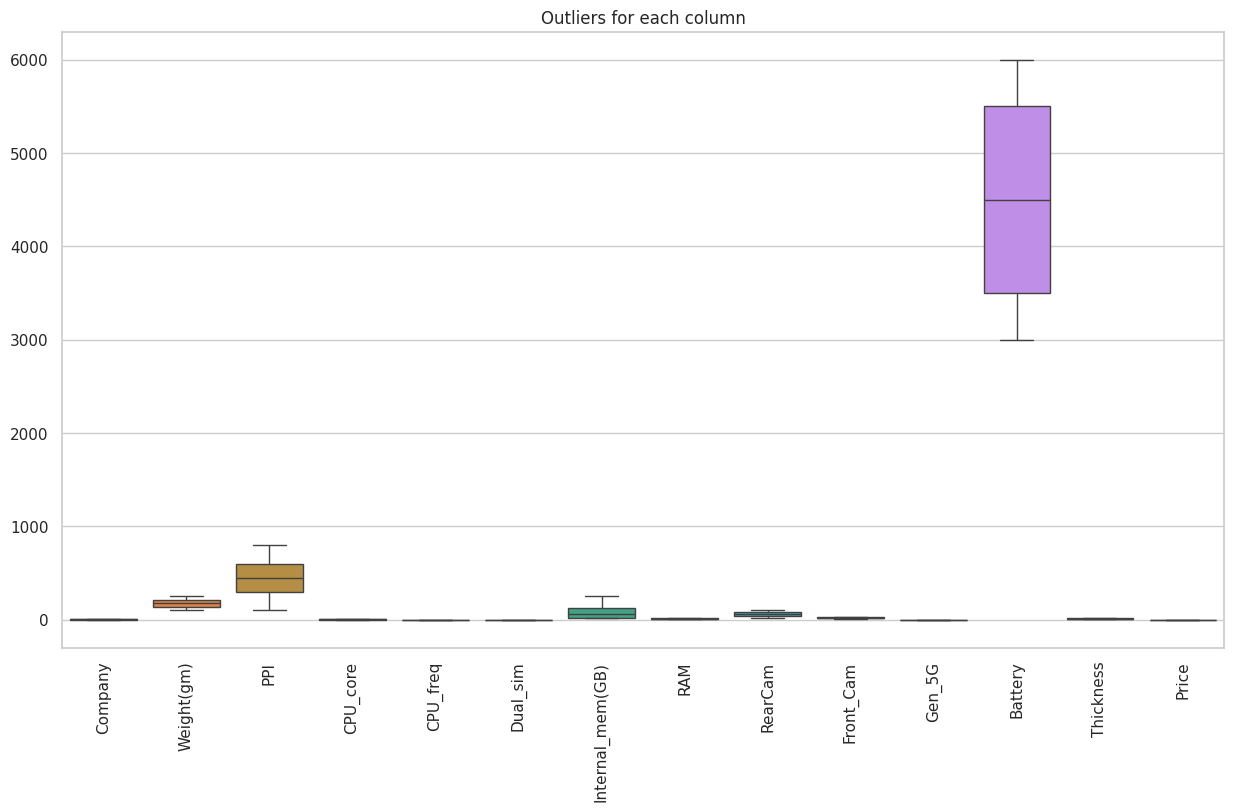

In [330]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_no_outliers2)
plt.title('Outliers for each column')
plt.xticks(rotation='vertical')
plt.show()

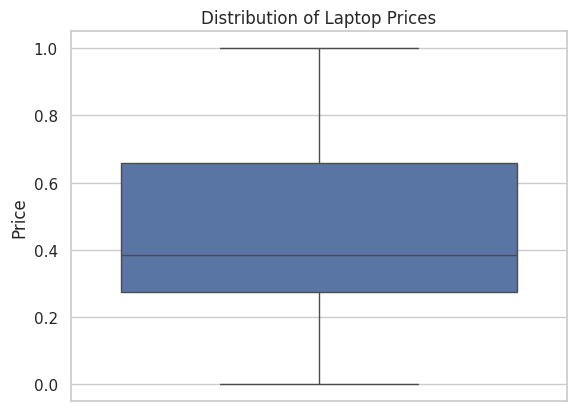

In [331]:
sns.boxplot(data=df_no_outliers2, y='Price')
plt.title('Distribution of Laptop Prices')
plt.show()

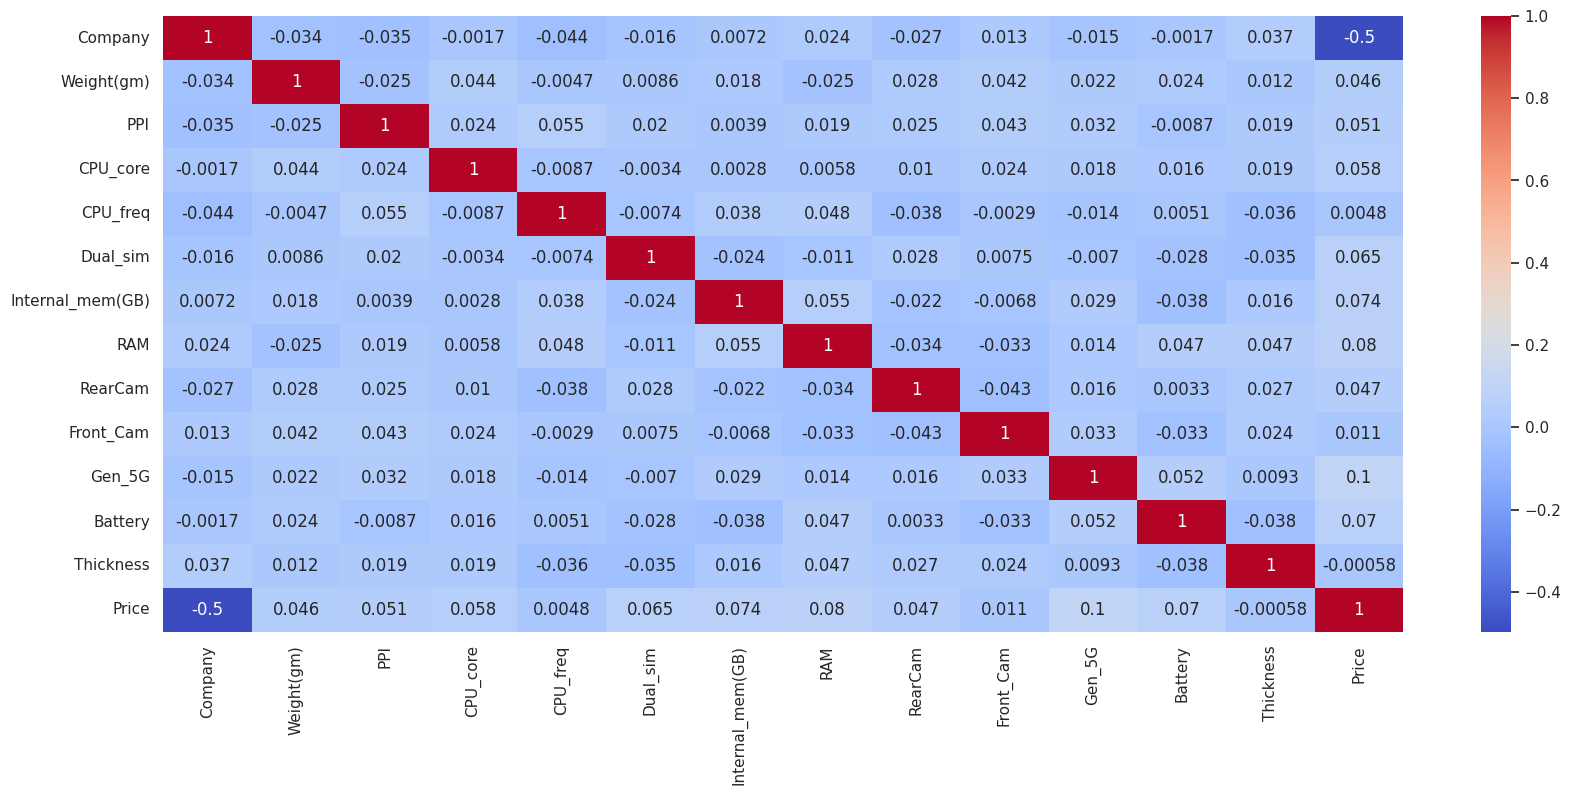

In [332]:
plt.figure(figsize=(20, 8))
correlation_matrix = df_no_outliers2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [333]:
df_1 = df_merged.copy()

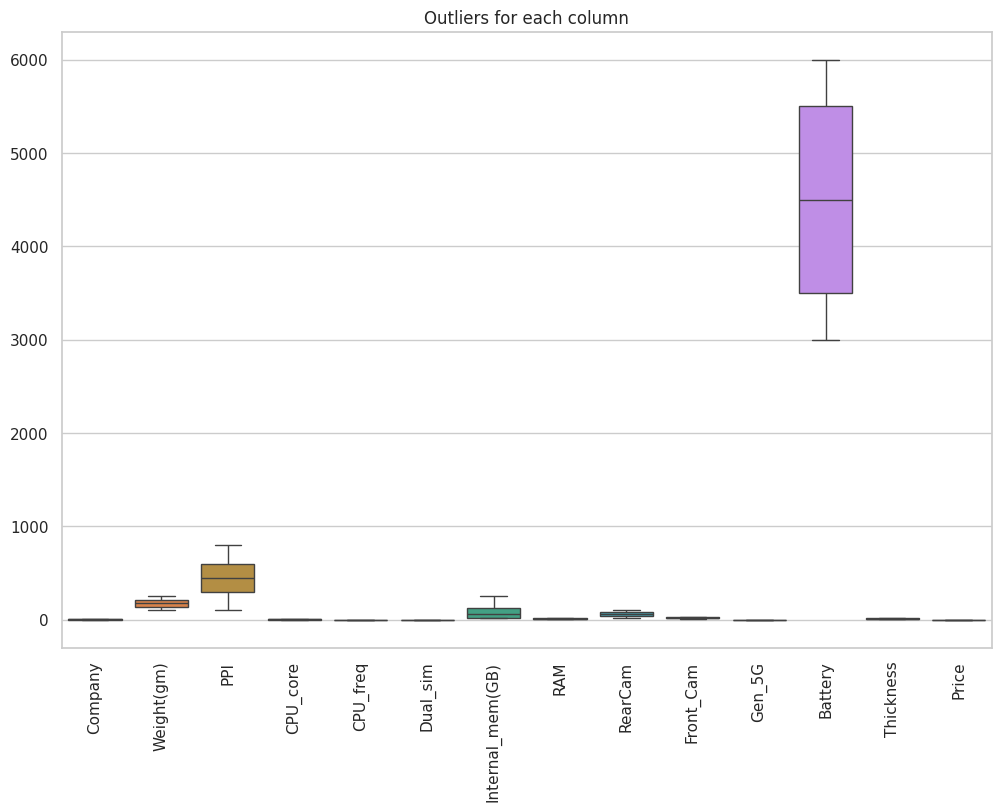

In [334]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation='vertical')
sns.boxplot(data=df_no_outliers2)
plt.title('Outliers for each column')
plt.show()

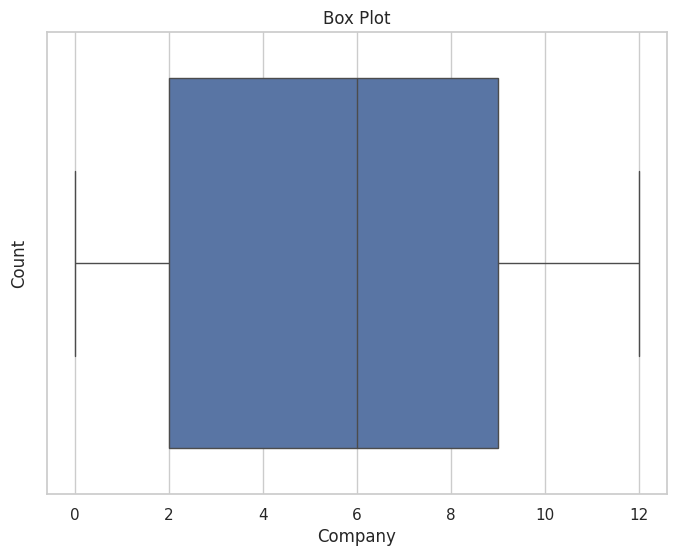

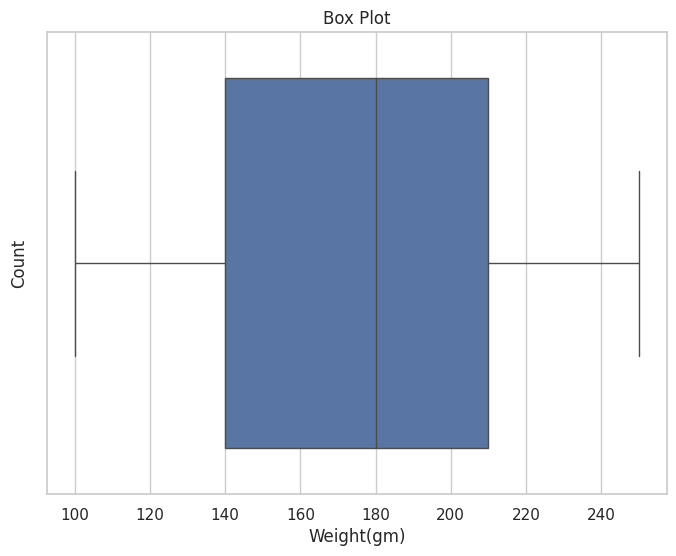

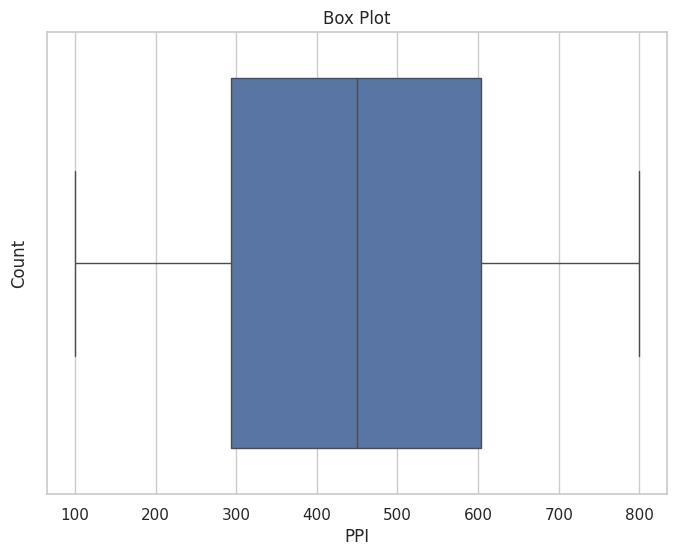

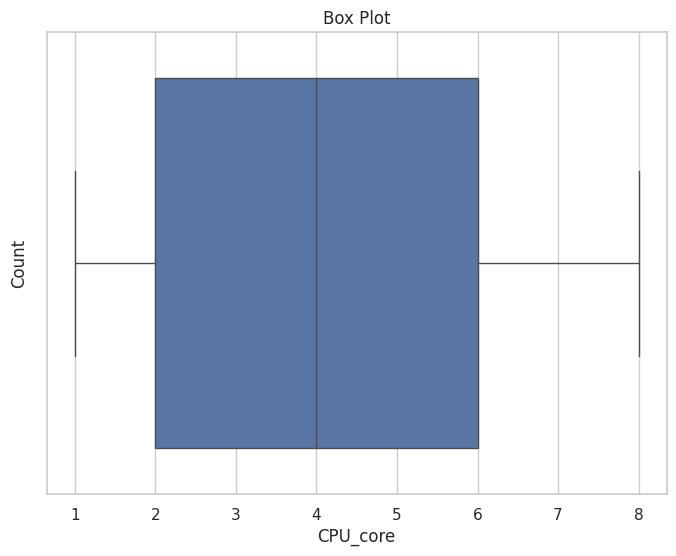

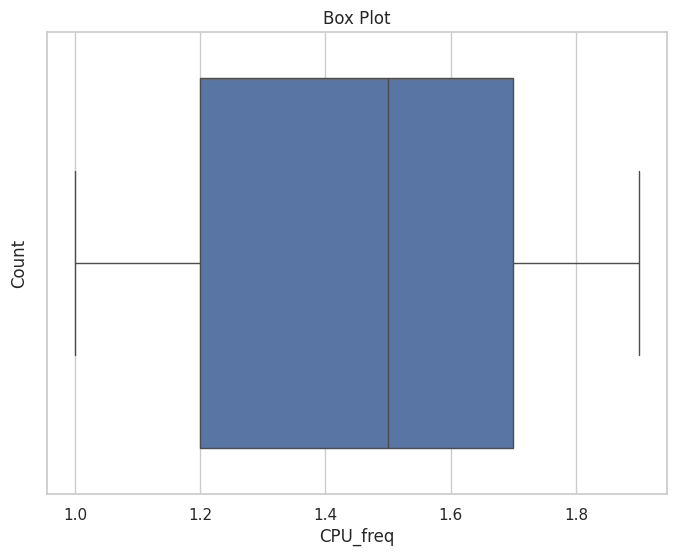

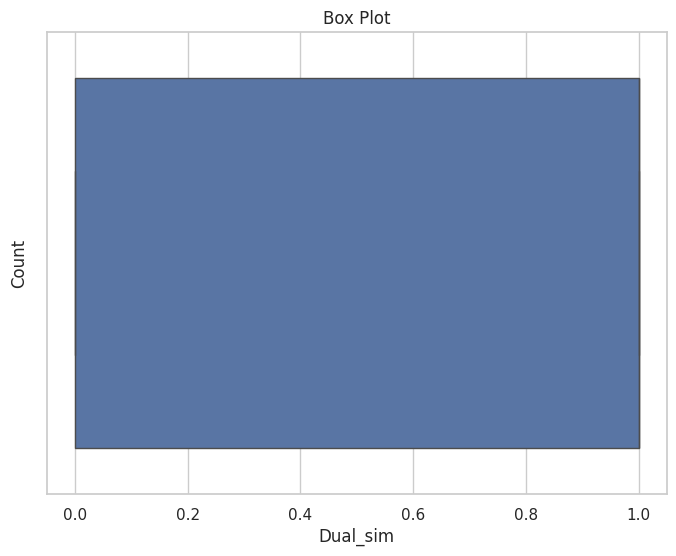

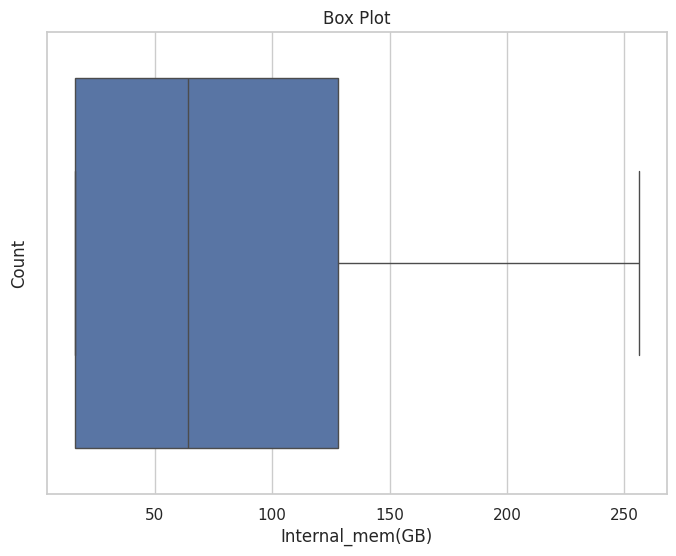

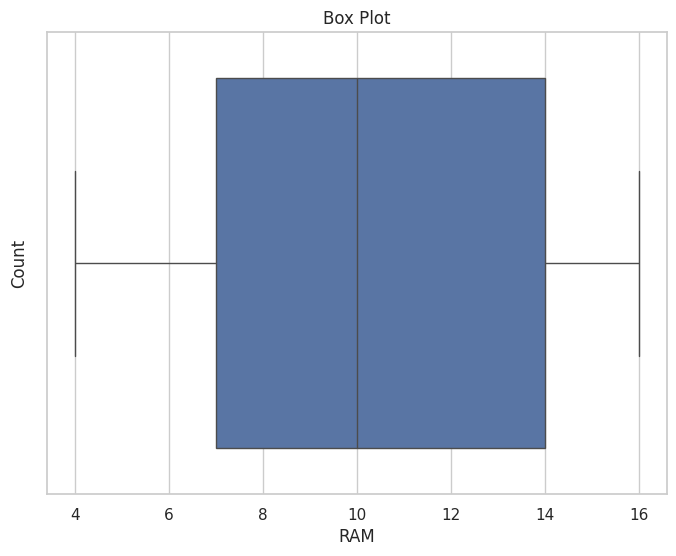

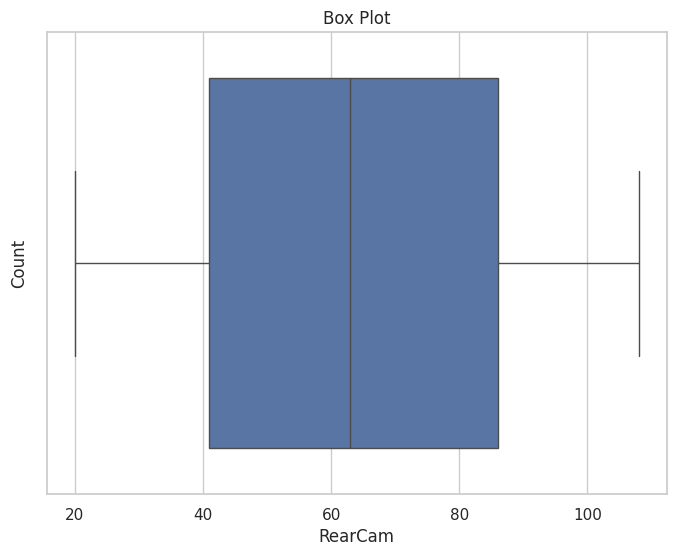

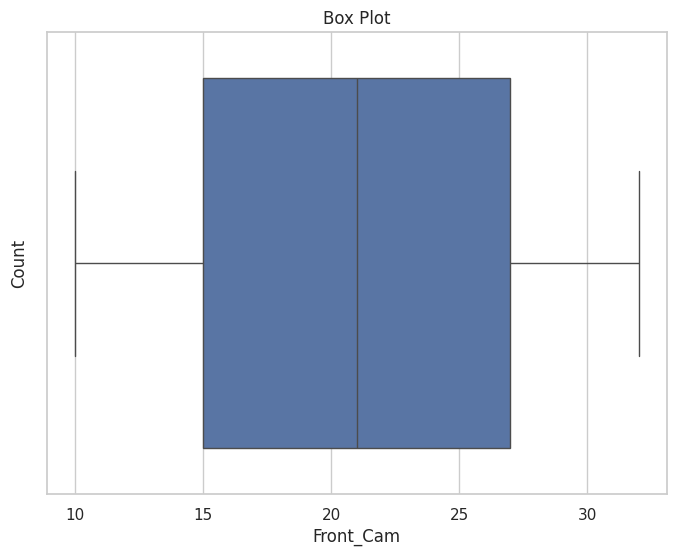

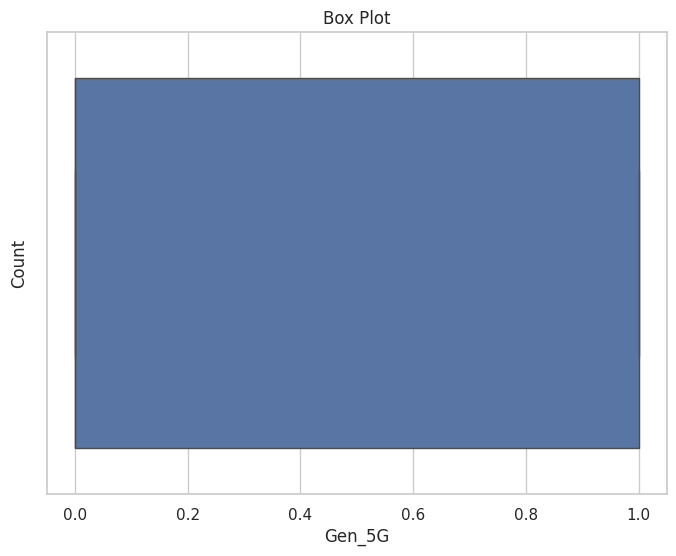

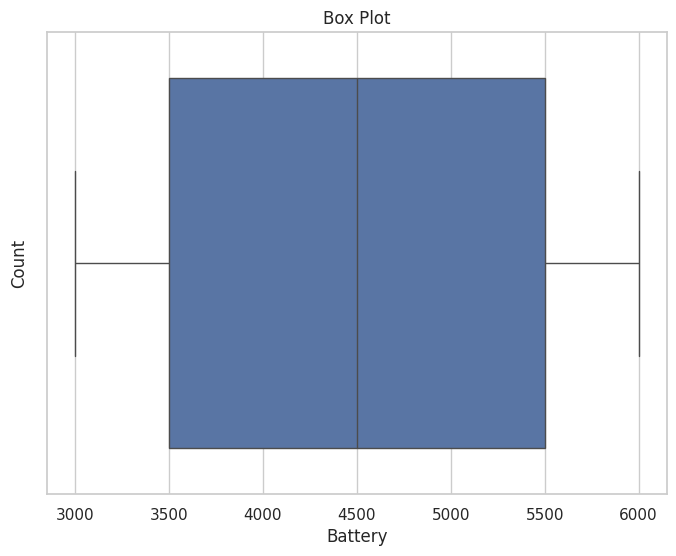

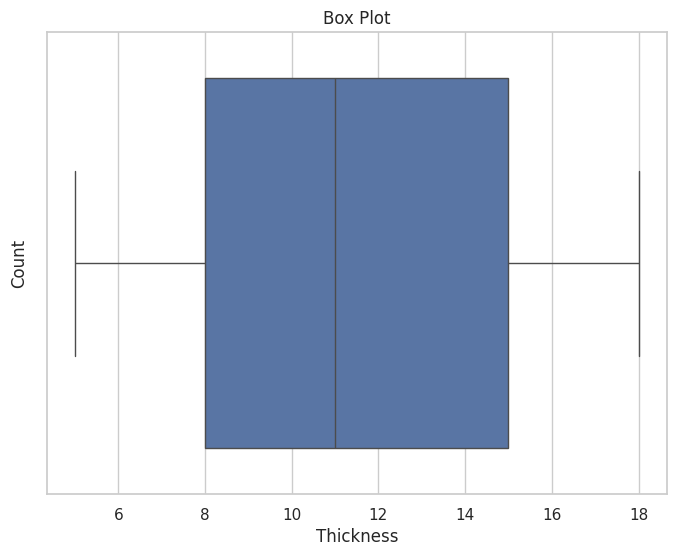

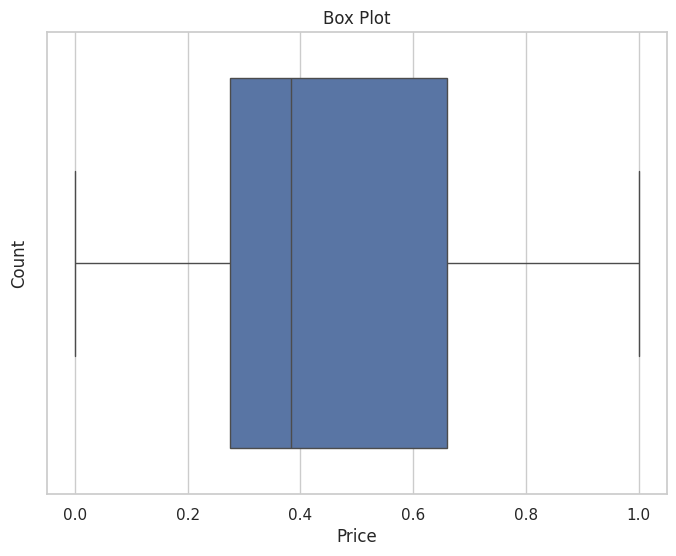

In [335]:
for column in df_no_outliers2.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=column, data=df_no_outliers2)
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.title('Box Plot')
  plt.show()

In [336]:
df_no_outliers2.head(n=3)

Company  Weight(gm)  PPI  CPU_core  CPU_freq  Dual_sim  Internal_mem(GB)  \
0        9       180.0  312         1       1.5         0              16.0   
1        2       160.0  362         1       1.6         0              64.0   
2        1       160.0  241         1       1.0         0              16.0   

   RAM  RearCam  Front_Cam  Gen_5G  Battery  Thickness     Price  
0    8       77         31     1.0   5000.0         17  0.594341  
1    8       51         13     0.0   3000.0         12  0.520853  
2   11       84         23     0.0   5000.0         11  0.685658

In [372]:
column_types = df_no_outliers2.dtypes
print(column_types)

Company             category
Weight(gm)          category
PPI                 category
CPU_core            category
CPU_freq            category
Dual_sim            category
Internal_mem(GB)    category
RAM                 category
RearCam             category
Front_Cam           category
Gen_5G              category
Battery             category
Thickness           category
Price               category
dtype: object


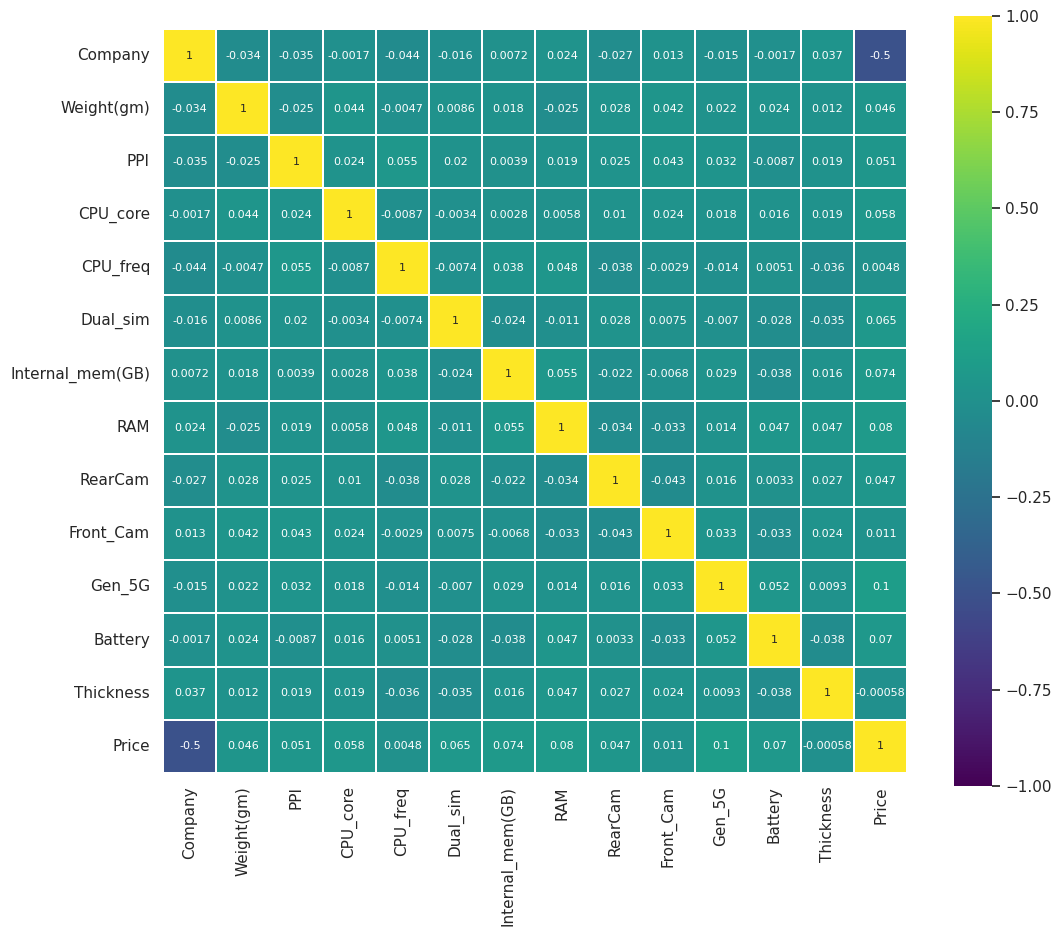

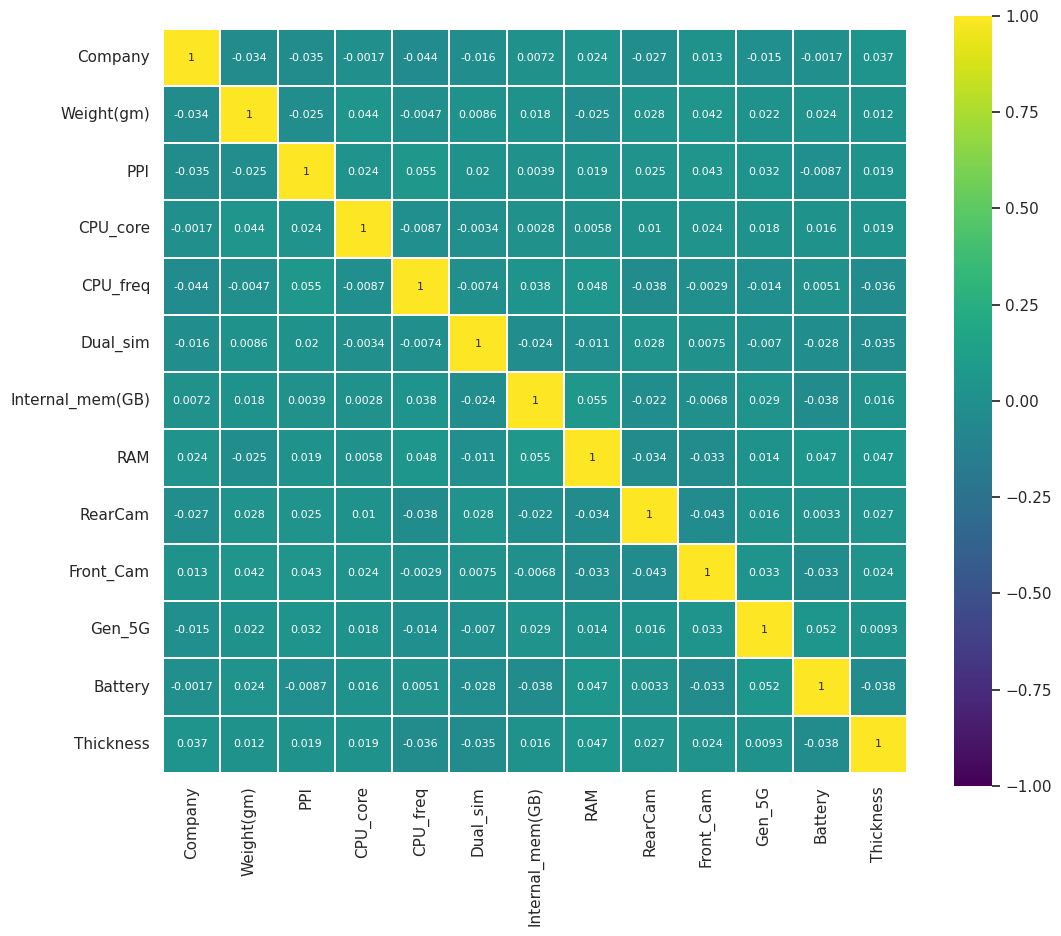

In [337]:
corr = df_no_outliers2.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr <= 0.5) | (corr >= -0.4)],cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
corr = df_no_outliers2.drop('Price', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr <= 0.5) | (corr >= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# **EDA**

In [338]:
# sns.pairplot(df_no_outliers2,hue="Price")

In [376]:
df_no_outliers2['Company'] = df_no_outliers2['Company'].astype('int')

numeric_columns = ['Weight(gm)', 'PPI', 'CPU_core', 'CPU_freq', 'Internal_mem(GB)', 'RAM', 'Dual_sim','RearCam', 'Front_Cam', 'Gen_5G', 'Battery', 'Thickness', 'Price']
df_no_outliers2[numeric_columns] = df_no_outliers2[numeric_columns].astype('float')

column_types = df_no_outliers2.dtypes
print(column_types)

Company               int64
Weight(gm)          float64
PPI                 float64
CPU_core            float64
CPU_freq            float64
Dual_sim            float64
Internal_mem(GB)    float64
RAM                 float64
RearCam             float64
Front_Cam           float64
Gen_5G              float64
Battery             float64
Thickness           float64
Price               float64
dtype: object


# How mobile Prices are distribution across Companies

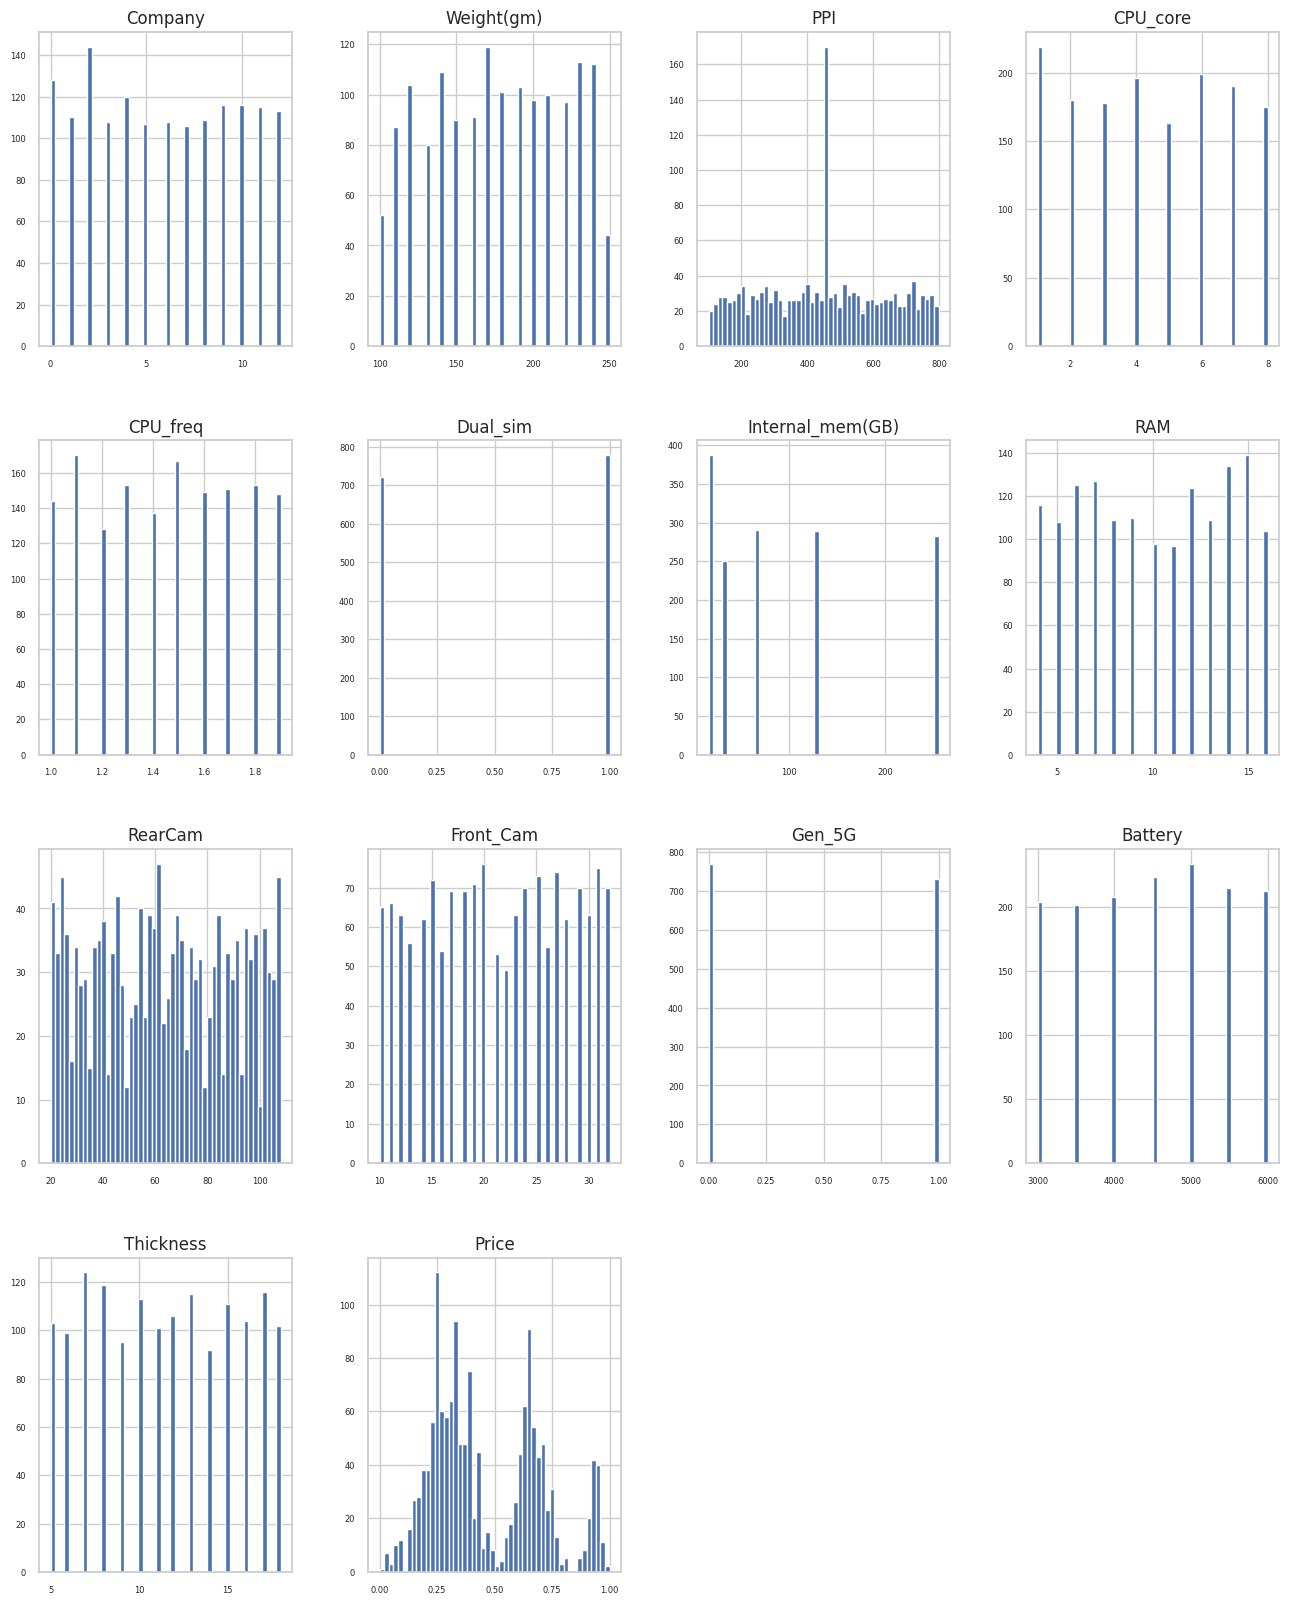

In [380]:
df_no_outliers2.hist(figsize=(16, 20), bins=50, xlabelsize=6, ylabelsize=6);

# Pair Plots

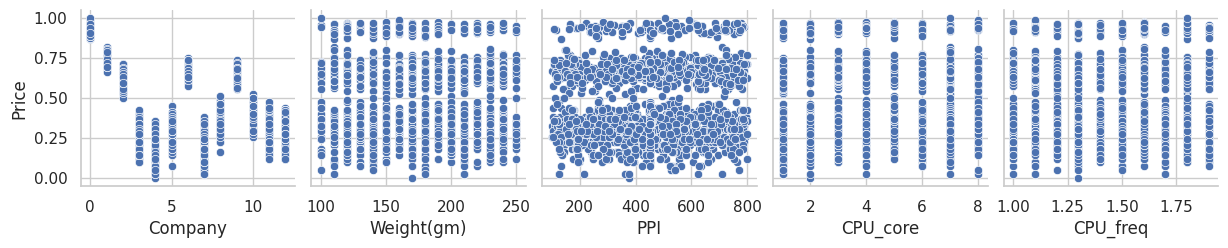

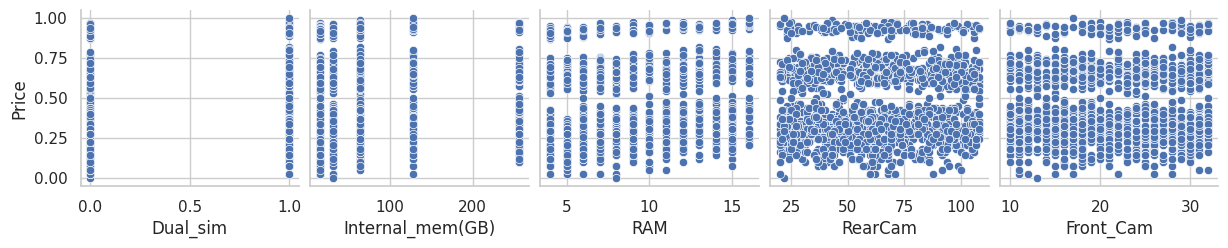

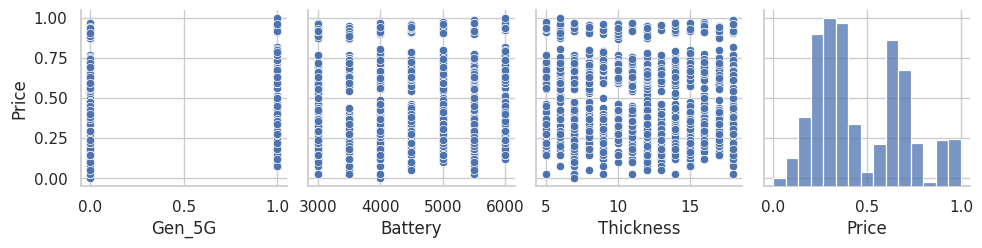

In [381]:
for i in range(0, len(df_no_outliers2.columns), 5):
    sns.pairplot(data=df_no_outliers2,
                x_vars=df_no_outliers2.columns[i:i+5],
                y_vars=['Price'])

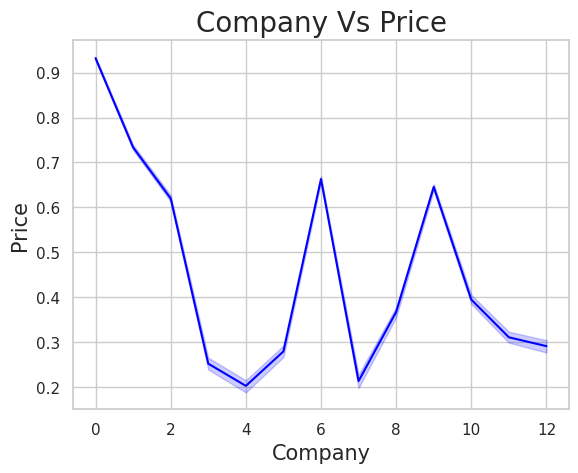

In [340]:
sns.lineplot(data=df_no_outliers2,x='Company',y='Price',color='blue')
plt.title('Company Vs Price',fontsize=20)
plt.xlabel('Company',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

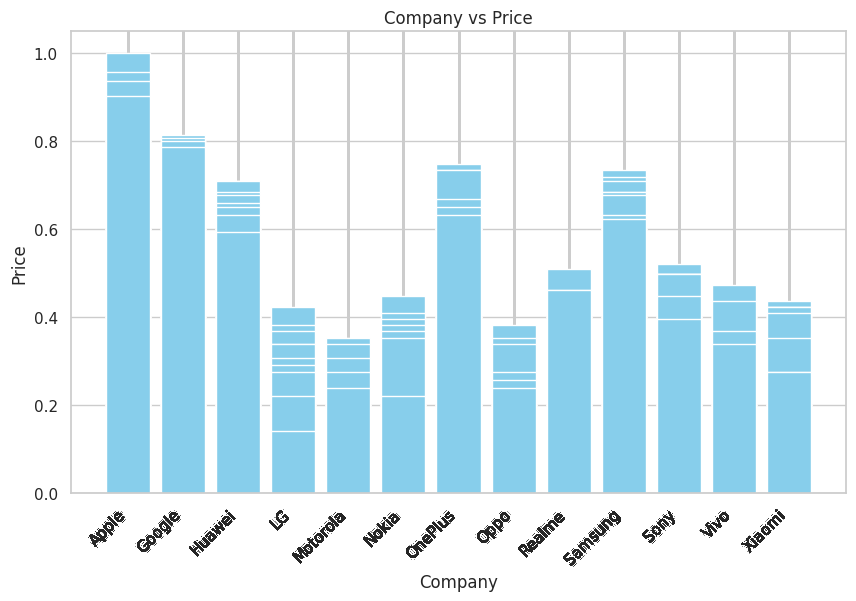

In [341]:
import matplotlib.pyplot as plt
company_encoding = {
    0: 'Apple',
    1: 'Google',
    2: 'Huawei',
    3: 'LG',
    4: 'Motorola',
    5: 'Nokia',
    6: 'OnePlus',
    7: 'Oppo',
    8: 'Realme',
    9: 'Samsung',
    10: 'Sony',
    11: 'Vivo',
    12: 'Xiaomi'
}
plt.figure(figsize=(10, 6))
plt.bar(df_no_outliers2['Company'], df_no_outliers2['Price'], color='skyblue')

plt.title('Company vs Price')
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(df_no_outliers2['Company'], [company_encoding[company] for company in df_no_outliers2['Company']], rotation=45, ha='right')

plt.show()

# How the mobile price is distributed

count    1500.000000
mean        0.463338
std         0.236044
min         0.000000
25%         0.275045
50%         0.383050
75%         0.659710
max         1.000000
Name: Price, dtype: float64


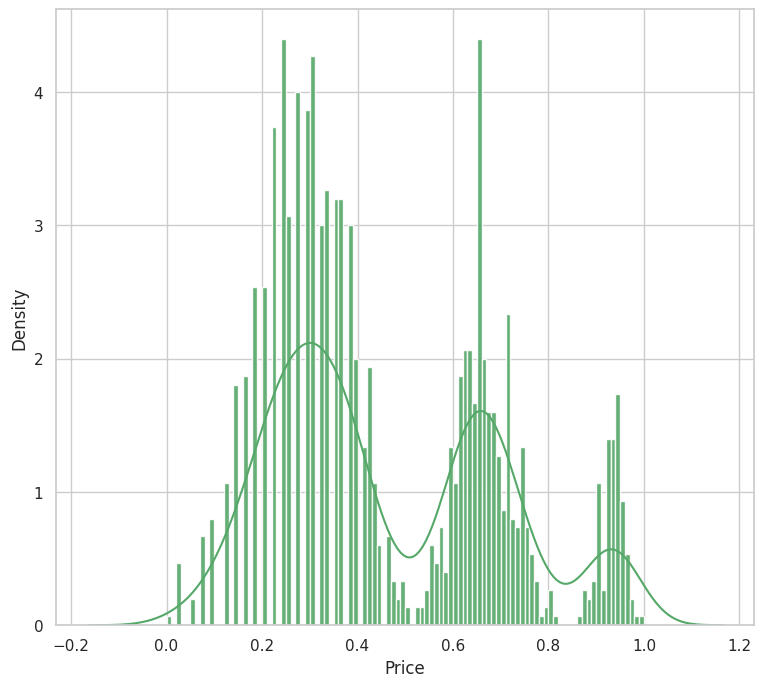

In [342]:
print(df_no_outliers2['Price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_no_outliers2['Price'], color='g', bins=100, hist_kws={'alpha': 0.9});

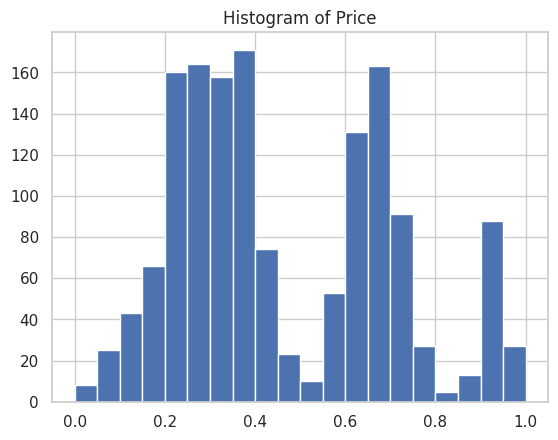

In [343]:
plt.hist(df_no_outliers2['Price'], bins=20)
plt.title('Histogram of Price')
plt.show()

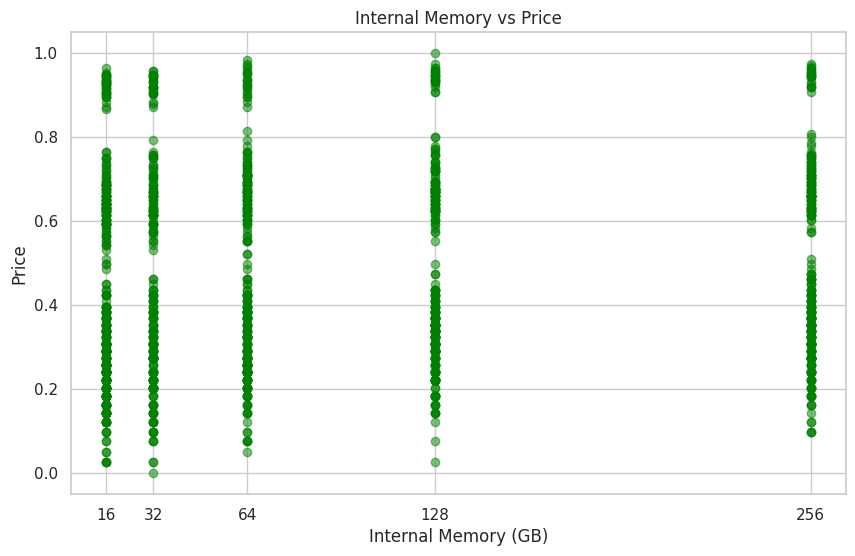

In [345]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(df_no_outliers2['Internal_mem(GB)'], df_no_outliers2['Price'], color='green', alpha=0.5)

# Set title and labels
plt.title('Internal Memory vs Price')
plt.xlabel('Internal Memory (GB)')
plt.ylabel('Price')

# Set the x-axis labels based on the internal memory values
plt.xticks(df_no_outliers2['Internal_mem(GB)'].unique())

# Display the plot
plt.show()

# Ploting the distribution of quantitative features

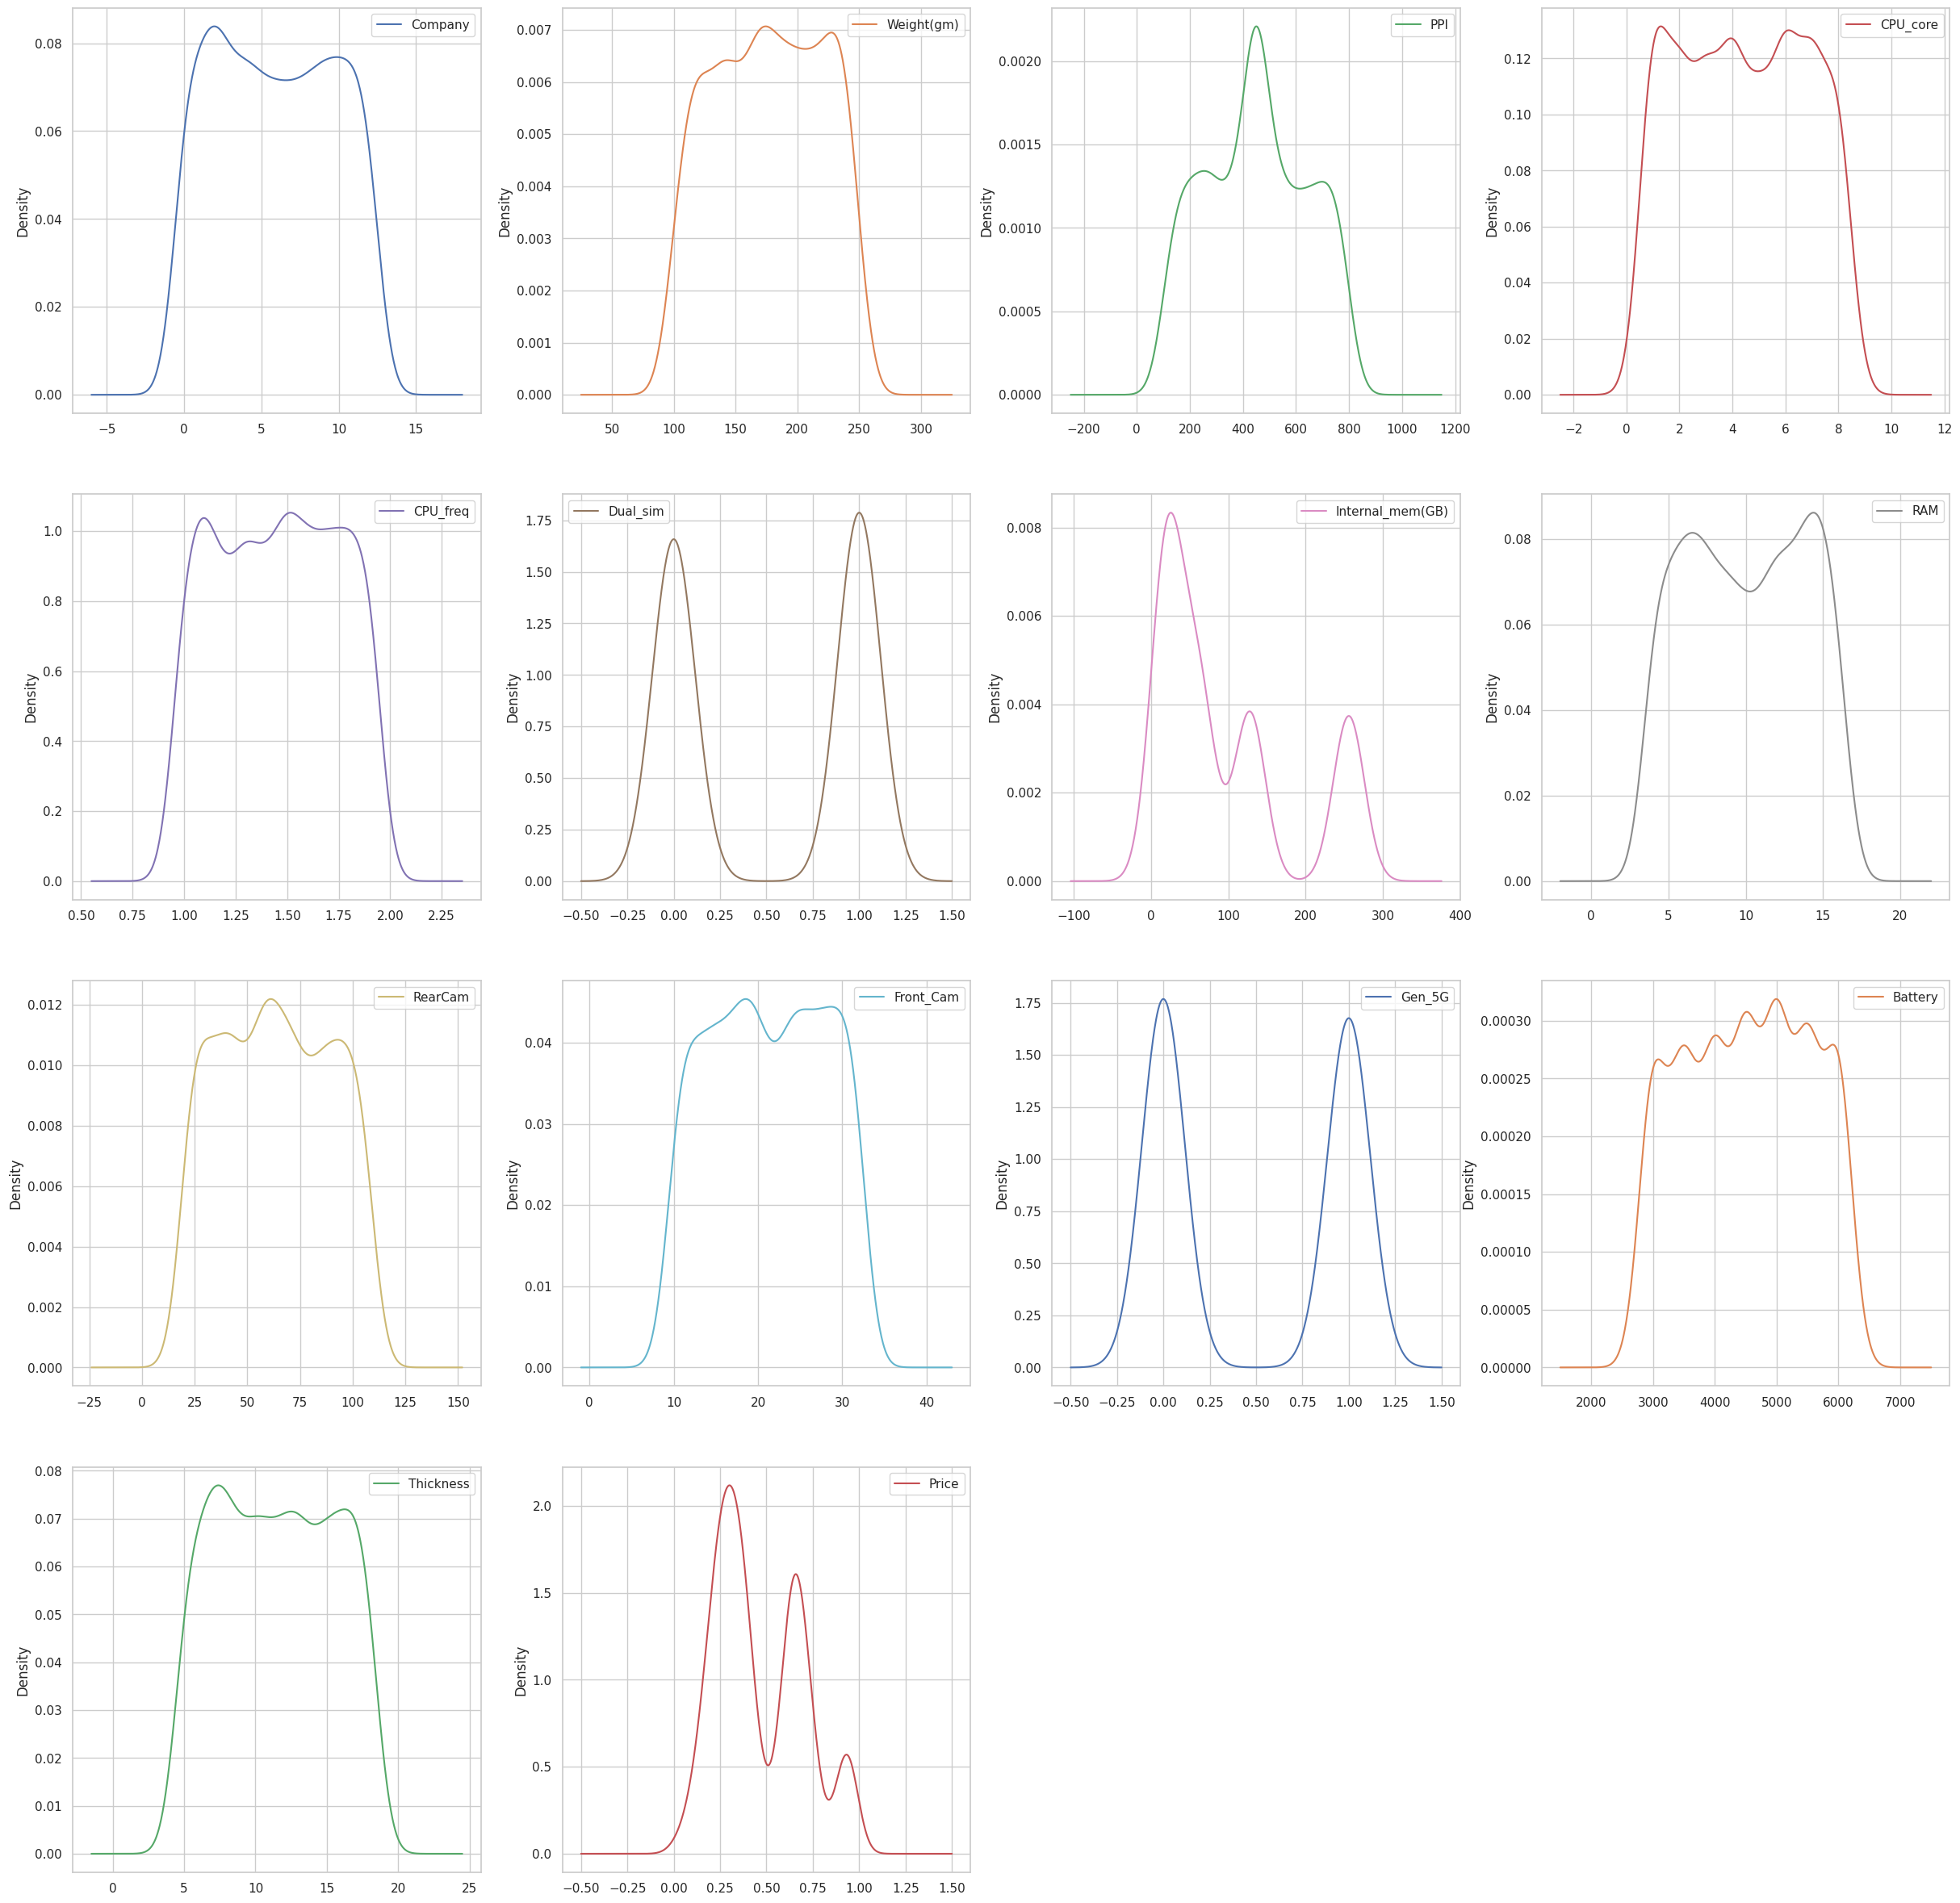

In [346]:
import math
quantitative_features = df_no_outliers2.select_dtypes(include=['float64', 'int64']).columns
num_features = len(quantitative_features)

layout_rows = math.ceil(math.sqrt(num_features))
layout_cols = math.ceil(num_features / layout_rows)

df_no_outliers2[quantitative_features].plot(
    kind='density', subplots=True, layout=(layout_rows, layout_cols), sharex=False, figsize=(30, 30)
)
plt.show()

# percentage of mobiles across the companies

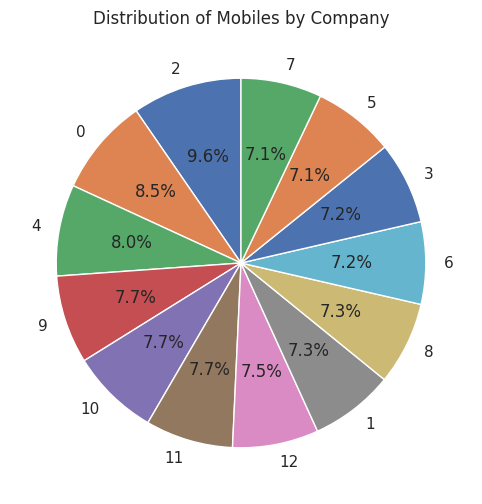

In [347]:
import matplotlib.pyplot as plt
company_counts = df_no_outliers2['Company'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Mobiles by Company')
plt.show()

# comparison of price & companies based on Ram

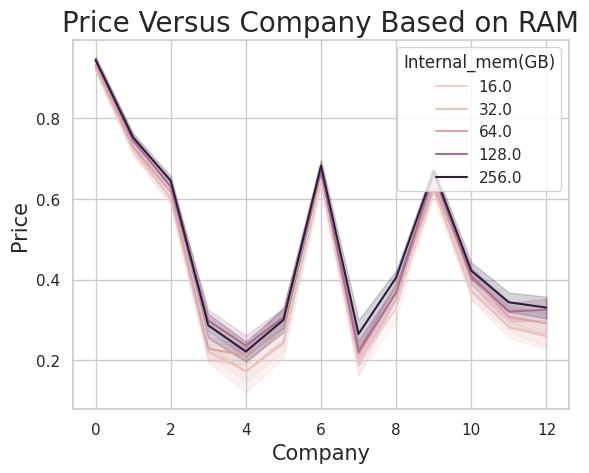

In [348]:
sns.lineplot(data=df_no_outliers2,x='Company',y='Price',hue='Internal_mem(GB)')
plt.title('Price Versus Company Based on RAM',fontsize=20)
plt.xlabel('Company',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# Price Comparison by Company and 5G Generation

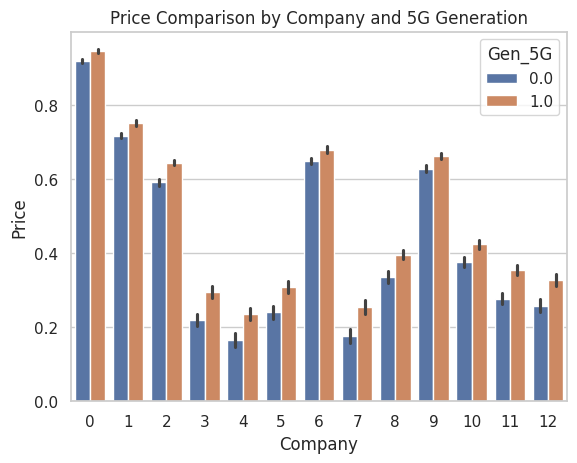

In [349]:
sns.barplot(data=df_no_outliers2, x='Company', y='Price', hue='Gen_5G')
plt.title('Price Comparison by Company and 5G Generation')
plt.show()

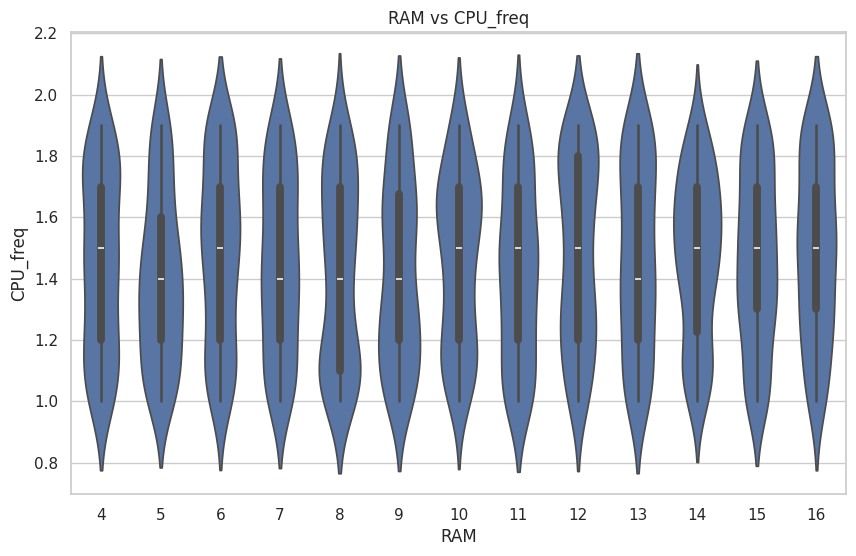

In [350]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='RAM', y='CPU_freq', data=df_no_outliers2)
plt.xlabel('RAM')
plt.ylabel('CPU_freq')
plt.title('RAM vs CPU_freq')
plt.show()

In [351]:
df_no_outliers2.head()

Company  Weight(gm)  PPI  CPU_core  CPU_freq  Dual_sim  Internal_mem(GB)  \
0        9       180.0  312         1       1.5         0              16.0   
1        2       160.0  362         1       1.6         0              64.0   
2        1       160.0  241         1       1.0         0              16.0   
3        6       210.0  555         4       1.2         1              32.0   
4       11       100.0  607         8       1.8         1             128.0   

   RAM  RearCam  Front_Cam  Gen_5G  Battery  Thickness     Price  
0    8       77         31     1.0   5000.0         17  0.594341  
1    8       51         13     0.0   3000.0         12  0.520853  
2   11       84         23     0.0   5000.0         11  0.685658  
3    7       91         10     0.0   6000.0          8  0.659710  
4   12       71         27     0.0   4500.0         11  0.368775

# Price Comparison based on Dual sim feature


In [352]:
import plotly.express as px

# Assuming df_no_outliers1 is your DataFrame
fig = px.scatter(df_no_outliers2, x="Dual_sim", y="Price")

# Define custom y-axis tick values and labels
custom_x_ticks = [0, 1]

# Update layout to set custom y-axis ticks
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=custom_x_ticks,
    ),
    width=800,
    height=600,
)
fig.show()

# comparison of price & Ram

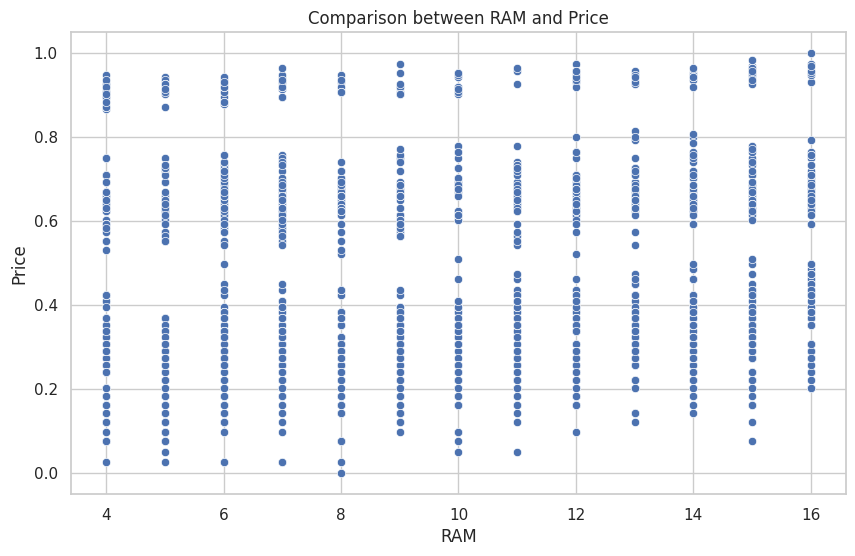

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM', y='Price', data=df_no_outliers2)
plt.title('Comparison between RAM and Price')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.grid(True)
plt.show()

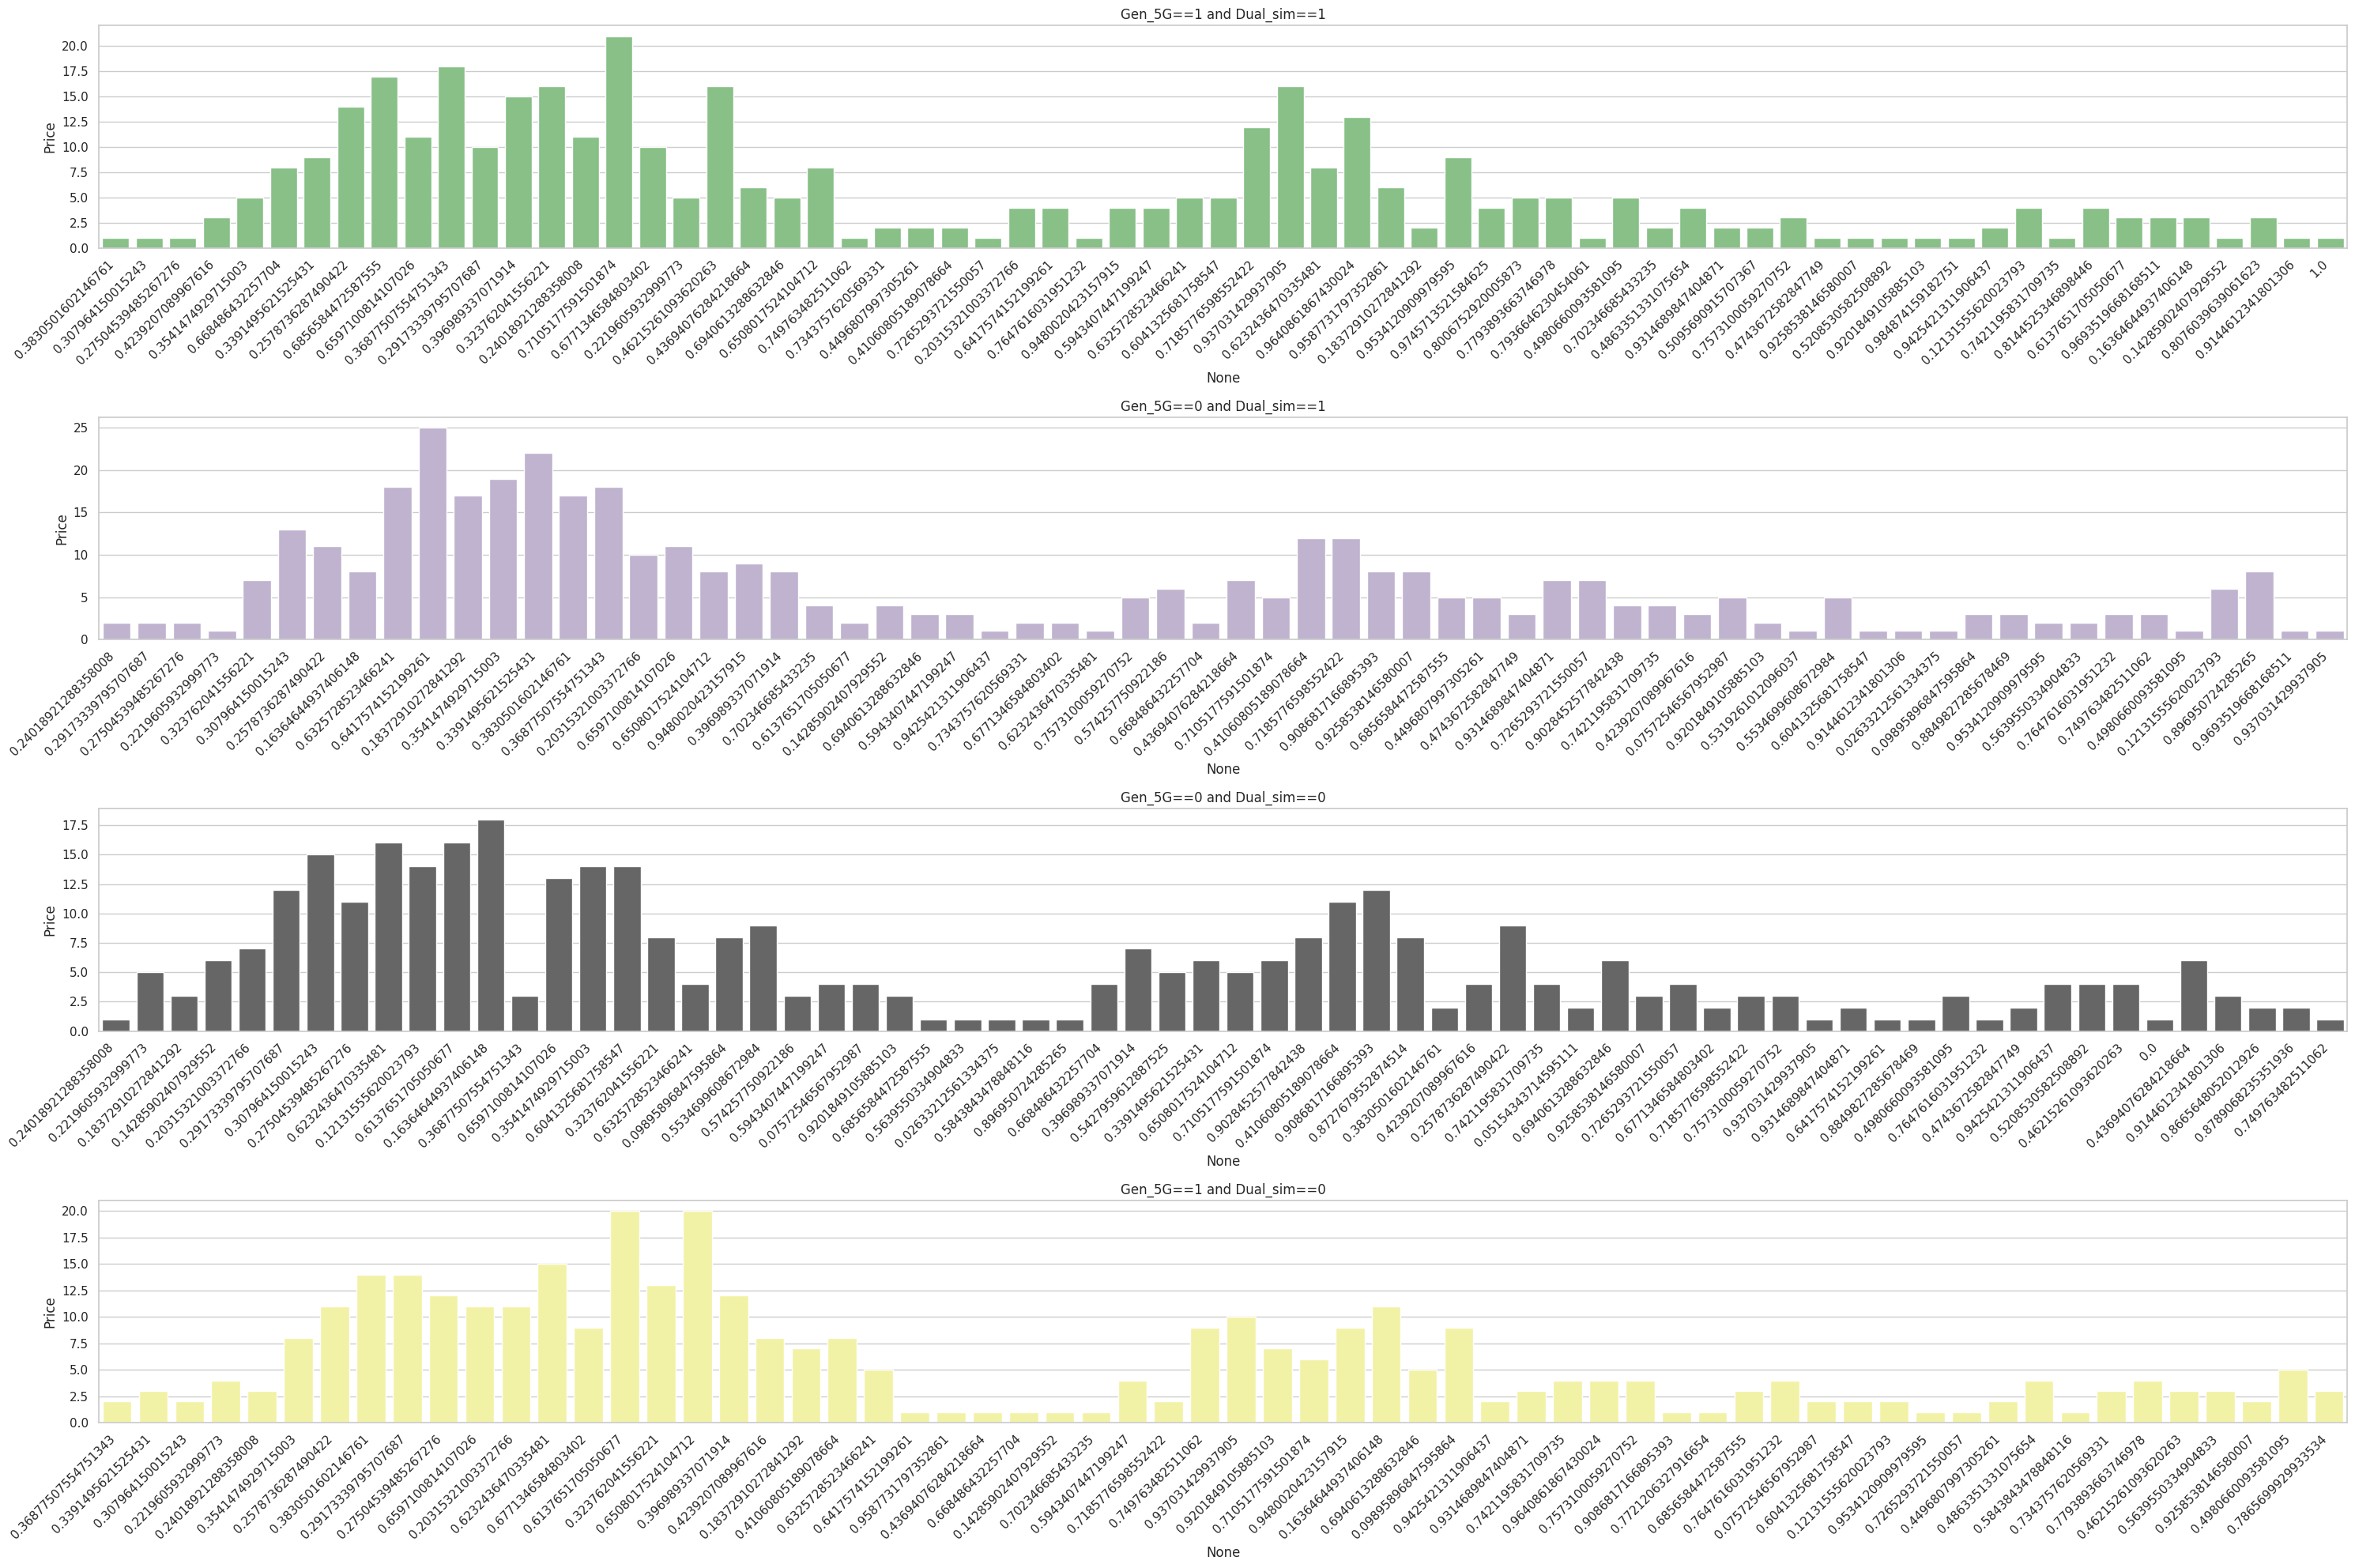

In [354]:
from matplotlib import cm

cl = cm.get_cmap('Accent')
tw1 = df_no_outliers2.query('Gen_5G==1 and Dual_sim==1')['Price'].value_counts()
tw2 = df_no_outliers2.query('Gen_5G==0 and Dual_sim==1')['Price'].value_counts()
tw3 = df_no_outliers2.query('Gen_5G==0 and Dual_sim==0')['Price'].value_counts()
tw4 = df_no_outliers2.query('Gen_5G==1 and Dual_sim==0')['Price'].value_counts()

colors = [cl(0), cl(0.2), cl(0.9), cl(0.4)]
twlist = [tw1, tw2, tw3, tw4]
titles = ['Gen_5G==1 and Dual_sim==1', 'Gen_5G==0 and Dual_sim==1', 'Gen_5G==0 and Dual_sim==0', 'Gen_5G==1 and Dual_sim==0']

fig, axis = plt.subplots(4, 1, figsize=(30, 20))
for i in range(4):
    sns.barplot(y=twlist[i], x=twlist[i].index, ax=axis[i], color=colors[i])
    axis[i].set_title(titles[i])
    axis[i].set_xticks(range(len(twlist[i].index)))
    axis[i].set_xticklabels(twlist[i].index, rotation=45, ha='right')

fig.tight_layout()
plt.show()

# comparison of price & Battery

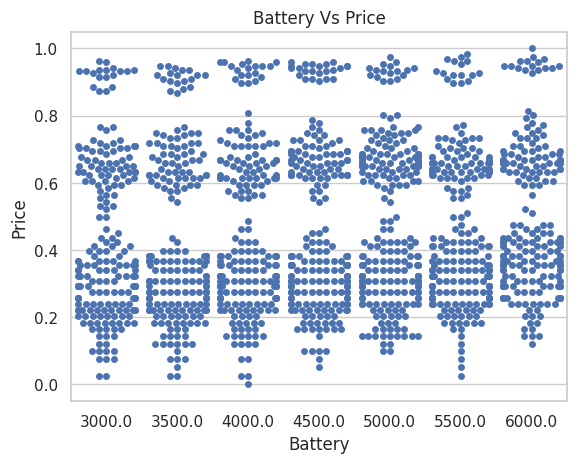

In [355]:
sns.swarmplot(data=df_no_outliers2, x='Battery', y='Price')
plt.title('Battery Vs Price')
plt.show()

# comparison of price & cpu_core

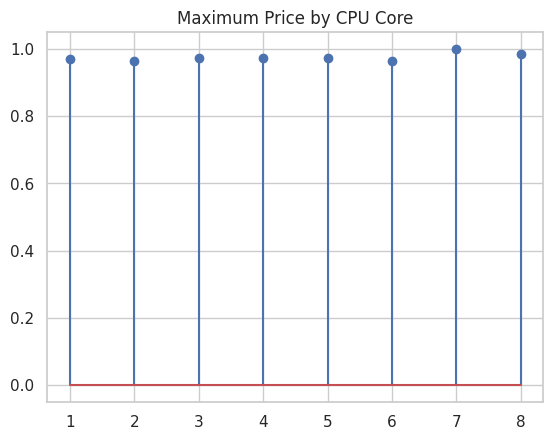

In [356]:
d_grouped = df_no_outliers2.groupby('CPU_core')[['CPU_core', 'Price']].max()
plt.stem(d_grouped['CPU_core'], d_grouped['Price'])
plt.title('Maximum Price by CPU Core')
plt.show()

In [357]:
pip install squarify

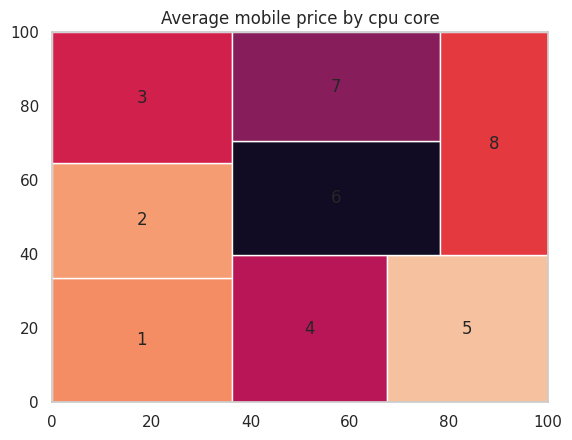

In [358]:
import squarify
d1_grouped = df_no_outliers2[['CPU_core', 'Price']].groupby('CPU_core').mean().reset_index()
# Creating a treemap
squarify.plot(sizes=d1_grouped['Price'], label=d1_grouped['CPU_core'])
plt.title('Average mobile price by cpu core')
plt.show()

# comparison of price & cpu freq

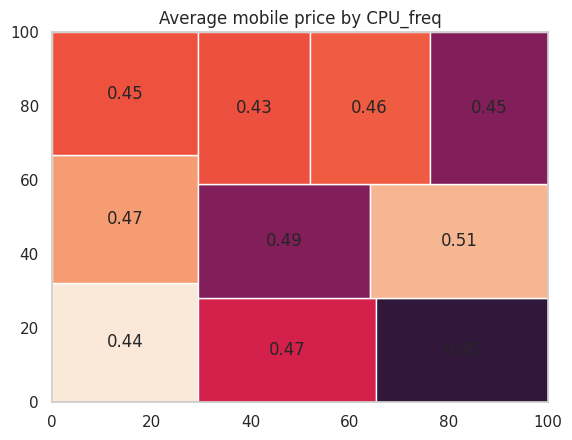

In [359]:
import squarify
d1_grouped = df_no_outliers2[['CPU_freq', 'Price']].groupby('CPU_freq').mean().reset_index()
# Creating a treemap
squarify.plot(sizes=d1_grouped['Price'], label=[f'{price:.2f}' for freq, price in zip(d1_grouped['CPU_freq'], d1_grouped['Price'])])
plt.title('Average mobile price by CPU_freq')
plt.show()

<Axes: ylabel='Frequency'>

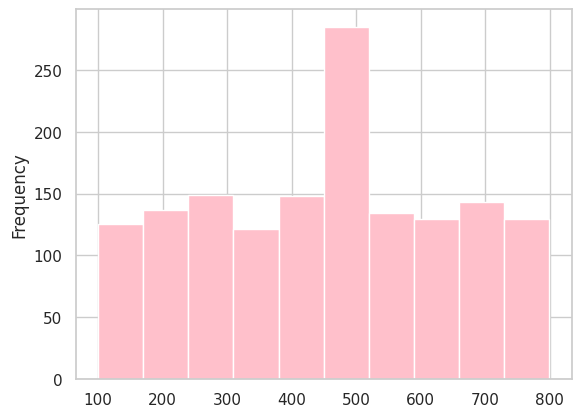

In [360]:
df_no_outliers2['PPI'].plot(kind='hist',bins=10, color='pink')

# comparison of Ram & Battery & Company

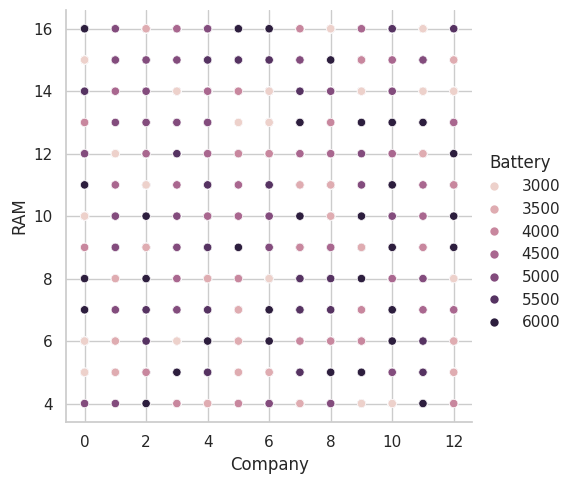

In [361]:
sns.relplot(x='Company', y='RAM', hue='Battery', data=df_no_outliers2)

# PPI Vs Company

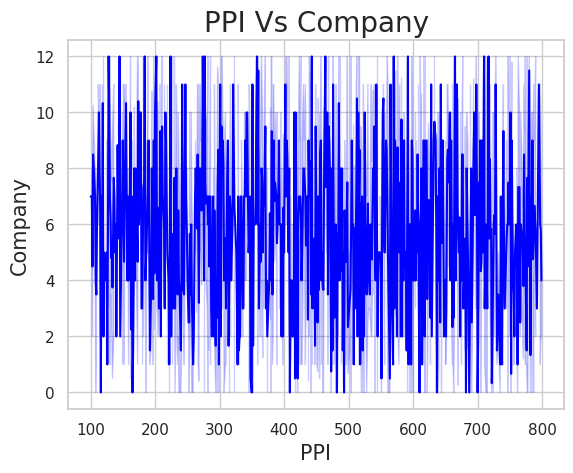

In [362]:
sns.lineplot(data=df_no_outliers2,x='PPI',y='Company',color='blue')
plt.title('PPI Vs Company',fontsize=20)
plt.xlabel('PPI',fontsize=15)
plt.ylabel('Company',fontsize=15)
plt.show()